In [9]:
import tensorflow
# from keras.applications.resnet50 import ResNet50, preprocess_input

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D

In [13]:
model=ResNet50(weights='imagenet',include_top=False, input_shape=(224,224,3))
model.trainable=False

94765736/94765736 [==============================] - 0s 0us/step


In [14]:
model=tensorflow.keras.Sequential([
    model, 
    GlobalMaxPooling2D()
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [1]:
import cv2
import numpy as np
from numpy.linalg import norm

In [3]:
img=cv2.imread("1636.jpg")
img=cv2.resize(img, (224,224))

In [4]:
img=np.array(img)

In [5]:
img.shape

(224, 224, 3)

In [6]:
expand_img=np.expand_dims(img, axis=0)

In [7]:
expand_img.shape

(1, 224, 224, 3)

In [10]:
pre_img=preprocess_input(expand_img)

In [11]:
pre_img.shape

(1, 224, 224, 3)

In [15]:
result=model.predict(pre_img).flatten()


1/1 [==============================] - 10s 10s/step


In [16]:
result

array([ 2.2339365 ,  0.13992442,  3.0384815 , ...,  5.5091763 ,
        5.6520133 , 10.097453  ], dtype=float32)

In [17]:
normalized=result/norm(result)

In [18]:
normalized.shape

(2048,)

In [19]:
def extract_feature(img_path, model):
    img=cv2.imread(img_path)
    img=cv2.resize(img, (224,224))
    img=np.array(img)
    expand_img=np.expand_dims(img, axis=0)
    pre_img=preprocess_input(expand_img)
    result=model.predict(pre_img).flatten()
    normalized=result/norm(result)
    return normalized

In [20]:
extract_feature("1636.jpg",model)

1/1 [==============================] - 0s 27ms/step


array([0.00596655, 0.00037372, 0.00811539, ..., 0.01471429, 0.01509579,
       0.02696898], dtype=float32)

In [21]:
import os
from tqdm import tqdm

In [22]:
filename=[]
feature_list=[]

for file in os.listdir('Dataset'):
    filename.append(os.path.join('Dataset',file))

In [23]:
filename[0:5]

['Dataset/33255.jpg',
 'Dataset/22841.jpg',
 'Dataset/15045.jpg',
 'Dataset/21853.jpg',
 'Dataset/22539.jpg']

In [24]:
for file in tqdm(filename):
    feature_list.append(extract_feature(file,model))

  0%|          | 0/1720 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 1/1720 [00:00<04:59,  5.74it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 2/1720 [00:00<04:07,  6.93it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 3/1720 [00:00<04:10,  6.87it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 4/1720 [00:00<04:15,  6.71it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 5/1720 [00:00<03:46,  7.59it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 6/1720 [00:00<03:27,  8.26it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 7/1720 [00:00<03:47,  7.53it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 8/1720 [00:01<03:44,  7.61it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 9/1720 [00:01<03:36,  7.91it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 10/1720 [00:01<03:37,  7.87it/s]

1/1 [==============================] - 0s 35ms/step


  1%|          | 11/1720 [00:01<03:46,  7.53it/s]

1/1 [==============================] - 0s 35ms/step


  1%|          | 12/1720 [00:01<04:06,  6.94it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 13/1720 [00:01<04:08,  6.86it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 14/1720 [00:01<04:16,  6.66it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 15/1720 [00:02<04:10,  6.81it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 16/1720 [00:02<04:21,  6.51it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 17/1720 [00:02<04:12,  6.74it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 18/1720 [00:02<04:20,  6.55it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 19/1720 [00:02<04:21,  6.51it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 20/1720 [00:02<04:22,  6.48it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 21/1720 [00:03<04:12,  6.74it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 22/1720 [00:03<04:10,  6.79it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 23/1720 [00:03<03:52,  7.29it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 24/1720 [00:03<03:54,  7.23it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▏         | 25/1720 [00:03<03:54,  7.22it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 26/1720 [00:03<03:48,  7.41it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 27/1720 [00:03<03:38,  7.75it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 28/1720 [00:03<03:46,  7.47it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 29/1720 [00:04<03:57,  7.11it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 30/1720 [00:04<04:24,  6.38it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 31/1720 [00:04<04:21,  6.46it/s]

1/1 [==============================] - 0s 56ms/step


  2%|▏         | 32/1720 [00:04<04:53,  5.75it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 33/1720 [00:04<05:15,  5.35it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 34/1720 [00:05<05:16,  5.33it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 35/1720 [00:05<04:49,  5.82it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 36/1720 [00:05<04:49,  5.82it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 37/1720 [00:05<05:14,  5.36it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 38/1720 [00:05<05:02,  5.55it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 39/1720 [00:05<05:15,  5.33it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 40/1720 [00:06<05:26,  5.15it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 41/1720 [00:06<05:39,  4.95it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 42/1720 [00:06<05:45,  4.86it/s]

1/1 [==============================] - 0s 58ms/step


  2%|▎         | 43/1720 [00:06<05:18,  5.27it/s]

1/1 [==============================] - 0s 53ms/step


  3%|▎         | 44/1720 [00:06<05:42,  4.90it/s]

1/1 [==============================] - 0s 40ms/step


  3%|▎         | 45/1720 [00:07<05:21,  5.22it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 46/1720 [00:07<04:53,  5.71it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 47/1720 [00:07<05:03,  5.51it/s]

1/1 [==============================] - 0s 40ms/step


  3%|▎         | 48/1720 [00:07<05:00,  5.56it/s]

1/1 [==============================] - 0s 51ms/step


  3%|▎         | 49/1720 [00:07<04:48,  5.79it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 50/1720 [00:07<04:31,  6.15it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 51/1720 [00:08<04:27,  6.25it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 52/1720 [00:08<04:40,  5.95it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 53/1720 [00:08<05:12,  5.33it/s]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 54/1720 [00:08<05:03,  5.48it/s]

1/1 [==============================] - 0s 47ms/step


  3%|▎         | 55/1720 [00:08<05:09,  5.37it/s]

1/1 [==============================] - 0s 53ms/step


  3%|▎         | 56/1720 [00:09<04:42,  5.90it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 57/1720 [00:09<04:38,  5.97it/s]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 58/1720 [00:09<04:47,  5.77it/s]

1/1 [==============================] - 0s 40ms/step


  3%|▎         | 59/1720 [00:09<04:54,  5.64it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 60/1720 [00:09<04:30,  6.15it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▎         | 61/1720 [00:09<04:16,  6.46it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▎         | 62/1720 [00:10<04:41,  5.89it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▎         | 63/1720 [00:10<04:56,  5.59it/s]

1/1 [==============================] - 0s 49ms/step


  4%|▎         | 64/1720 [00:10<05:11,  5.32it/s]

1/1 [==============================] - 0s 51ms/step


  4%|▍         | 65/1720 [00:10<05:25,  5.08it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 66/1720 [00:10<05:32,  4.98it/s]

1/1 [==============================] - 0s 52ms/step


  4%|▍         | 67/1720 [00:11<05:36,  4.91it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 68/1720 [00:11<05:02,  5.47it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 69/1720 [00:11<05:05,  5.40it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 70/1720 [00:11<05:20,  5.15it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 71/1720 [00:11<05:35,  4.92it/s]

1/1 [==============================] - 0s 51ms/step


  4%|▍         | 72/1720 [00:12<05:27,  5.02it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 73/1720 [00:12<06:07,  4.48it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 74/1720 [00:12<06:05,  4.50it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▍         | 75/1720 [00:12<06:20,  4.32it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 76/1720 [00:12<05:39,  4.85it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 77/1720 [00:13<05:24,  5.06it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 78/1720 [00:13<05:03,  5.41it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▍         | 79/1720 [00:13<04:47,  5.71it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 80/1720 [00:13<04:11,  6.53it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 82/1720 [00:13<03:48,  7.18it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 83/1720 [00:13<03:49,  7.12it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 84/1720 [00:14<03:52,  7.05it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 85/1720 [00:14<04:16,  6.38it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 86/1720 [00:14<04:03,  6.72it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 87/1720 [00:14<04:01,  6.76it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 88/1720 [00:14<04:02,  6.72it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 89/1720 [00:14<04:03,  6.70it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 90/1720 [00:14<03:51,  7.05it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 91/1720 [00:15<04:01,  6.74it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▌         | 92/1720 [00:15<04:04,  6.67it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 93/1720 [00:15<04:11,  6.46it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 94/1720 [00:15<03:54,  6.94it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 95/1720 [00:15<03:42,  7.31it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 96/1720 [00:15<03:50,  7.03it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 97/1720 [00:15<03:56,  6.86it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 98/1720 [00:16<03:59,  6.76it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 99/1720 [00:16<04:01,  6.72it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 100/1720 [00:16<03:58,  6.78it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 101/1720 [00:16<04:00,  6.74it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 102/1720 [00:16<04:09,  6.49it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 103/1720 [00:16<03:50,  7.00it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 104/1720 [00:16<03:32,  7.61it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 105/1720 [00:17<03:51,  6.98it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 106/1720 [00:17<03:58,  6.77it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 107/1720 [00:17<03:59,  6.72it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▋         | 108/1720 [00:17<03:59,  6.74it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▋         | 109/1720 [00:17<03:44,  7.19it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 110/1720 [00:17<03:54,  6.87it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▋         | 111/1720 [00:18<03:43,  7.21it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 112/1720 [00:18<03:47,  7.07it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 113/1720 [00:18<03:45,  7.14it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 114/1720 [00:18<03:44,  7.17it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 115/1720 [00:18<03:47,  7.04it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 116/1720 [00:18<03:36,  7.41it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 117/1720 [00:18<03:40,  7.27it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 118/1720 [00:18<03:44,  7.15it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 119/1720 [00:19<03:33,  7.51it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 120/1720 [00:19<03:28,  7.67it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 121/1720 [00:19<03:50,  6.95it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 122/1720 [00:19<04:00,  6.65it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 123/1720 [00:19<04:00,  6.65it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 124/1720 [00:19<03:45,  7.07it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 125/1720 [00:20<04:06,  6.46it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 126/1720 [00:20<03:59,  6.65it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 127/1720 [00:20<04:08,  6.40it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 128/1720 [00:20<03:43,  7.12it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 129/1720 [00:20<03:43,  7.12it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 130/1720 [00:20<03:24,  7.79it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 131/1720 [00:20<03:30,  7.53it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 132/1720 [00:20<03:21,  7.88it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 133/1720 [00:21<03:33,  7.43it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 134/1720 [00:21<03:20,  7.89it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 135/1720 [00:21<03:52,  6.81it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 136/1720 [00:21<03:57,  6.67it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 137/1720 [00:21<03:54,  6.75it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 138/1720 [00:21<04:24,  5.98it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 139/1720 [00:22<04:34,  5.76it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 141/1720 [00:22<03:39,  7.18it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 142/1720 [00:22<03:42,  7.09it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 143/1720 [00:22<03:47,  6.92it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 144/1720 [00:22<03:29,  7.54it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 145/1720 [00:22<03:15,  8.05it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 146/1720 [00:22<03:50,  6.83it/s]

1/1 [==============================] - 0s 62ms/step


  9%|▊         | 147/1720 [00:23<04:37,  5.66it/s]

1/1 [==============================] - 0s 57ms/step


  9%|▊         | 148/1720 [00:23<04:29,  5.83it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▊         | 149/1720 [00:23<04:45,  5.50it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▊         | 150/1720 [00:23<04:54,  5.33it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 151/1720 [00:24<05:04,  5.15it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 152/1720 [00:24<05:24,  4.84it/s]

1/1 [==============================] - 0s 60ms/step


  9%|▉         | 153/1720 [00:24<05:29,  4.76it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▉         | 154/1720 [00:24<05:09,  5.07it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 155/1720 [00:24<05:08,  5.08it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 156/1720 [00:25<05:17,  4.92it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 157/1720 [00:25<05:12,  5.00it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 158/1720 [00:25<05:20,  4.87it/s]

1/1 [==============================] - 0s 56ms/step


  9%|▉         | 159/1720 [00:25<05:03,  5.15it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 160/1720 [00:25<04:51,  5.35it/s]

1/1 [==============================] - 0s 65ms/step


  9%|▉         | 161/1720 [00:26<05:15,  4.94it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 162/1720 [00:26<05:22,  4.83it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 163/1720 [00:26<04:57,  5.23it/s]

1/1 [==============================] - 0s 43ms/step


 10%|▉         | 164/1720 [00:26<05:13,  4.96it/s]

1/1 [==============================] - 0s 49ms/step


 10%|▉         | 165/1720 [00:26<05:18,  4.88it/s]

1/1 [==============================] - 0s 45ms/step


 10%|▉         | 166/1720 [00:27<05:37,  4.61it/s]

1/1 [==============================] - 0s 45ms/step


 10%|▉         | 167/1720 [00:27<05:33,  4.66it/s]

1/1 [==============================] - 0s 41ms/step


 10%|▉         | 168/1720 [00:27<05:33,  4.65it/s]

1/1 [==============================] - 0s 57ms/step


 10%|▉         | 169/1720 [00:27<05:40,  4.55it/s]

1/1 [==============================] - 0s 40ms/step


 10%|▉         | 170/1720 [00:27<05:27,  4.74it/s]

1/1 [==============================] - 0s 45ms/step


 10%|▉         | 171/1720 [00:28<04:52,  5.29it/s]

1/1 [==============================] - 0s 42ms/step


 10%|█         | 172/1720 [00:28<04:48,  5.37it/s]

1/1 [==============================] - 0s 38ms/step


 10%|█         | 173/1720 [00:28<04:55,  5.24it/s]

1/1 [==============================] - 0s 43ms/step


 10%|█         | 174/1720 [00:28<05:23,  4.78it/s]

1/1 [==============================] - 0s 72ms/step


 10%|█         | 175/1720 [00:28<05:35,  4.61it/s]

1/1 [==============================] - 0s 39ms/step


 10%|█         | 176/1720 [00:29<05:35,  4.60it/s]

1/1 [==============================] - 0s 44ms/step


 10%|█         | 177/1720 [00:29<05:43,  4.49it/s]

1/1 [==============================] - 0s 39ms/step


 10%|█         | 178/1720 [00:29<05:50,  4.40it/s]

1/1 [==============================] - 0s 41ms/step


 10%|█         | 179/1720 [00:29<05:43,  4.48it/s]

1/1 [==============================] - 0s 46ms/step


 10%|█         | 180/1720 [00:30<05:35,  4.59it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█         | 181/1720 [00:30<05:16,  4.86it/s]

1/1 [==============================] - 0s 55ms/step


 11%|█         | 182/1720 [00:30<05:22,  4.77it/s]

1/1 [==============================] - 0s 48ms/step


 11%|█         | 183/1720 [00:30<05:20,  4.80it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 184/1720 [00:30<04:57,  5.16it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 185/1720 [00:30<04:36,  5.56it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█         | 186/1720 [00:31<04:17,  5.97it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 187/1720 [00:31<04:09,  6.15it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 188/1720 [00:31<04:05,  6.23it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 189/1720 [00:31<03:55,  6.49it/s]

1/1 [==============================] - 0s 34ms/step


 11%|█         | 191/1720 [00:31<03:33,  7.16it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 192/1720 [00:31<03:42,  6.85it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 193/1720 [00:32<03:51,  6.60it/s]

1/1 [==============================] - 0s 31ms/step


 11%|█▏        | 194/1720 [00:32<03:51,  6.59it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 195/1720 [00:32<03:36,  7.05it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 196/1720 [00:32<03:17,  7.70it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 197/1720 [00:32<03:08,  8.10it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 198/1720 [00:32<03:02,  8.34it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 199/1720 [00:32<03:20,  7.59it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 200/1720 [00:32<03:09,  8.04it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 201/1720 [00:33<03:18,  7.66it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 202/1720 [00:33<03:30,  7.23it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 203/1720 [00:33<03:32,  7.14it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 204/1720 [00:33<03:30,  7.19it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 206/1720 [00:33<02:55,  8.60it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 207/1720 [00:33<03:18,  7.63it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 208/1720 [00:34<03:21,  7.50it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 209/1720 [00:34<03:16,  7.69it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 210/1720 [00:34<03:09,  7.97it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 211/1720 [00:34<03:29,  7.19it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 212/1720 [00:34<03:23,  7.41it/s]

1/1 [==============================] - 0s 32ms/step


 12%|█▏        | 213/1720 [00:34<03:18,  7.59it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 214/1720 [00:34<03:26,  7.30it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▎        | 215/1720 [00:34<03:13,  7.80it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 216/1720 [00:35<03:22,  7.41it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 217/1720 [00:35<03:09,  7.94it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 218/1720 [00:35<03:21,  7.45it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 219/1720 [00:35<03:07,  8.02it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 220/1720 [00:35<03:37,  6.88it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 221/1720 [00:35<03:37,  6.89it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 222/1720 [00:35<03:30,  7.12it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 223/1720 [00:36<03:26,  7.26it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 224/1720 [00:36<03:31,  7.07it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 225/1720 [00:36<03:22,  7.37it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 226/1720 [00:36<03:13,  7.72it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 227/1720 [00:36<03:21,  7.42it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 228/1720 [00:36<03:24,  7.30it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 229/1720 [00:36<03:32,  7.01it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 230/1720 [00:37<03:34,  6.95it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 231/1720 [00:37<03:36,  6.89it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 232/1720 [00:37<03:27,  7.17it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▎        | 233/1720 [00:37<03:36,  6.86it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 234/1720 [00:37<03:20,  7.42it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▎        | 235/1720 [00:37<03:08,  7.87it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▎        | 236/1720 [00:37<02:59,  8.28it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 237/1720 [00:37<02:52,  8.60it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 238/1720 [00:38<02:51,  8.65it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 239/1720 [00:38<03:11,  7.72it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█▍        | 240/1720 [00:38<03:20,  7.36it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█▍        | 241/1720 [00:38<03:30,  7.02it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 242/1720 [00:38<03:32,  6.95it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 243/1720 [00:38<03:36,  6.83it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 244/1720 [00:38<03:39,  6.71it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▍        | 245/1720 [00:39<03:41,  6.66it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 246/1720 [00:39<03:28,  7.06it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 247/1720 [00:39<03:22,  7.29it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 248/1720 [00:39<03:35,  6.82it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 249/1720 [00:39<03:40,  6.66it/s]

1/1 [==============================] - 0s 31ms/step


 15%|█▍        | 250/1720 [00:39<03:36,  6.80it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 251/1720 [00:39<03:18,  7.39it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 252/1720 [00:40<03:22,  7.24it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▍        | 253/1720 [00:40<03:31,  6.93it/s]

1/1 [==============================] - 0s 31ms/step


 15%|█▍        | 254/1720 [00:40<03:28,  7.04it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 255/1720 [00:40<03:29,  6.99it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 256/1720 [00:40<03:26,  7.09it/s]

1/1 [==============================] - 0s 41ms/step


 15%|█▍        | 257/1720 [00:40<03:45,  6.50it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█▌        | 258/1720 [00:41<04:30,  5.40it/s]

1/1 [==============================] - 0s 41ms/step


 15%|█▌        | 259/1720 [00:41<04:31,  5.39it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█▌        | 260/1720 [00:41<04:21,  5.58it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▌        | 261/1720 [00:41<04:28,  5.44it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▌        | 262/1720 [00:41<04:28,  5.42it/s]

1/1 [==============================] - 0s 51ms/step


 15%|█▌        | 263/1720 [00:42<05:01,  4.83it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▌        | 264/1720 [00:42<04:54,  4.94it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▌        | 265/1720 [00:42<04:54,  4.94it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▌        | 266/1720 [00:42<04:26,  5.45it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▌        | 267/1720 [00:42<04:08,  5.85it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 268/1720 [00:42<04:03,  5.97it/s]

1/1 [==============================] - 0s 60ms/step


 16%|█▌        | 269/1720 [00:43<04:50,  5.00it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▌        | 270/1720 [00:43<05:26,  4.44it/s]

1/1 [==============================] - 0s 53ms/step


 16%|█▌        | 271/1720 [00:43<05:10,  4.67it/s]

1/1 [==============================] - 0s 52ms/step


 16%|█▌        | 272/1720 [00:43<04:45,  5.07it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▌        | 273/1720 [00:44<04:46,  5.04it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▌        | 274/1720 [00:44<04:46,  5.05it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 275/1720 [00:44<05:04,  4.74it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▌        | 276/1720 [00:44<04:35,  5.24it/s]

1/1 [==============================] - 0s 41ms/step


 16%|█▌        | 277/1720 [00:44<04:48,  4.99it/s]

1/1 [==============================] - 0s 44ms/step


 16%|█▌        | 278/1720 [00:45<04:53,  4.91it/s]

1/1 [==============================] - 0s 52ms/step


 16%|█▌        | 279/1720 [00:45<04:38,  5.17it/s]

1/1 [==============================] - 0s 43ms/step


 16%|█▋        | 280/1720 [00:45<05:04,  4.73it/s]

1/1 [==============================] - 0s 50ms/step


 16%|█▋        | 281/1720 [00:45<04:45,  5.04it/s]

1/1 [==============================] - 0s 41ms/step


 16%|█▋        | 282/1720 [00:45<04:51,  4.93it/s]

1/1 [==============================] - 0s 50ms/step


 16%|█▋        | 283/1720 [00:46<04:59,  4.80it/s]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 284/1720 [00:46<05:13,  4.58it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 285/1720 [00:46<04:42,  5.08it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 286/1720 [00:46<04:42,  5.08it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 287/1720 [00:46<04:29,  5.32it/s]

1/1 [==============================] - 0s 41ms/step


 17%|█▋        | 288/1720 [00:47<04:34,  5.21it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 289/1720 [00:47<04:10,  5.70it/s]

1/1 [==============================] - 0s 49ms/step


 17%|█▋        | 290/1720 [00:47<04:09,  5.73it/s]

1/1 [==============================] - 0s 41ms/step


 17%|█▋        | 291/1720 [00:47<04:23,  5.42it/s]

1/1 [==============================] - 0s 62ms/step


 17%|█▋        | 292/1720 [00:47<04:51,  4.90it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 293/1720 [00:47<04:38,  5.12it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 294/1720 [00:48<04:46,  4.98it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 295/1720 [00:48<04:53,  4.86it/s]

1/1 [==============================] - 0s 48ms/step


 17%|█▋        | 296/1720 [00:48<04:58,  4.76it/s]

1/1 [==============================] - 0s 47ms/step


 17%|█▋        | 297/1720 [00:48<04:50,  4.90it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 298/1720 [00:48<04:21,  5.45it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 299/1720 [00:49<04:22,  5.42it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 300/1720 [00:49<04:13,  5.60it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█▊        | 301/1720 [00:49<03:56,  6.01it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 302/1720 [00:49<03:51,  6.13it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 303/1720 [00:49<03:40,  6.44it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 304/1720 [00:49<03:38,  6.48it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 305/1720 [00:50<03:19,  7.10it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 306/1720 [00:50<03:28,  6.78it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 307/1720 [00:50<03:40,  6.40it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 308/1720 [00:50<03:40,  6.42it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 309/1720 [00:50<03:38,  6.45it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 311/1720 [00:50<03:04,  7.65it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 312/1720 [00:50<03:07,  7.50it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 313/1720 [00:51<03:12,  7.31it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 314/1720 [00:51<03:18,  7.10it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 315/1720 [00:51<03:27,  6.76it/s]

1/1 [==============================] - 0s 32ms/step


 18%|█▊        | 317/1720 [00:51<03:06,  7.54it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 318/1720 [00:51<03:14,  7.21it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▊        | 319/1720 [00:52<03:27,  6.75it/s]

1/1 [==============================] - 0s 39ms/step


 19%|█▊        | 320/1720 [00:52<03:20,  6.98it/s]

1/1 [==============================] - 0s 31ms/step


 19%|█▊        | 321/1720 [00:52<03:24,  6.83it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▊        | 322/1720 [00:52<03:17,  7.08it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 323/1720 [00:52<03:09,  7.39it/s]

1/1 [==============================] - 0s 31ms/step


 19%|█▉        | 324/1720 [00:52<03:15,  7.12it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 325/1720 [00:52<03:12,  7.27it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 326/1720 [00:52<03:02,  7.63it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 327/1720 [00:53<02:56,  7.87it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 328/1720 [00:53<03:06,  7.47it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 329/1720 [00:53<03:24,  6.80it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 330/1720 [00:53<03:11,  7.25it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 331/1720 [00:53<03:09,  7.35it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 332/1720 [00:53<03:18,  7.00it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 333/1720 [00:53<03:13,  7.18it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 334/1720 [00:54<03:22,  6.85it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 335/1720 [00:54<03:27,  6.67it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 336/1720 [00:54<03:12,  7.20it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 337/1720 [00:54<03:06,  7.41it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 338/1720 [00:54<03:04,  7.49it/s]

1/1 [==============================] - 0s 30ms/step


 20%|█▉        | 339/1720 [00:54<03:12,  7.19it/s]

1/1 [==============================] - 0s 27ms/step


 20%|█▉        | 340/1720 [00:54<03:07,  7.36it/s]

1/1 [==============================] - 0s 30ms/step


 20%|█▉        | 341/1720 [00:55<02:58,  7.72it/s]

1/1 [==============================] - 0s 40ms/step


 20%|█▉        | 342/1720 [00:55<03:14,  7.07it/s]

1/1 [==============================] - 0s 30ms/step


 20%|█▉        | 343/1720 [00:55<03:17,  6.98it/s]

1/1 [==============================] - 0s 33ms/step


 20%|██        | 344/1720 [00:55<03:07,  7.36it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 345/1720 [00:55<03:20,  6.87it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 346/1720 [00:55<03:24,  6.72it/s]

1/1 [==============================] - 0s 29ms/step


 20%|██        | 347/1720 [00:55<03:13,  7.09it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 348/1720 [00:56<03:20,  6.85it/s]

1/1 [==============================] - 0s 30ms/step


 20%|██        | 349/1720 [00:56<03:09,  7.24it/s]

1/1 [==============================] - 0s 32ms/step


 20%|██        | 350/1720 [00:56<03:18,  6.91it/s]

1/1 [==============================] - 0s 29ms/step


 20%|██        | 351/1720 [00:56<03:10,  7.19it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 352/1720 [00:56<03:18,  6.88it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 353/1720 [00:56<03:28,  6.57it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 354/1720 [00:56<03:33,  6.41it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 355/1720 [00:57<03:19,  6.83it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 356/1720 [00:57<03:07,  7.28it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 357/1720 [00:57<02:56,  7.74it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 358/1720 [00:57<02:50,  8.00it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 359/1720 [00:57<03:09,  7.20it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 361/1720 [00:57<02:43,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 362/1720 [00:57<02:42,  8.37it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 363/1720 [00:58<02:42,  8.33it/s]

1/1 [==============================] - 0s 31ms/step


 21%|██        | 364/1720 [00:58<03:04,  7.35it/s]

1/1 [==============================] - 0s 30ms/step


 21%|██        | 365/1720 [00:58<02:56,  7.68it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██▏       | 366/1720 [00:58<02:57,  7.64it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██▏       | 367/1720 [00:58<03:06,  7.25it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██▏       | 368/1720 [00:58<02:54,  7.74it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██▏       | 369/1720 [00:58<02:58,  7.59it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 370/1720 [00:59<03:00,  7.48it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 371/1720 [00:59<03:26,  6.54it/s]

1/1 [==============================] - 0s 50ms/step


 22%|██▏       | 372/1720 [00:59<04:07,  5.46it/s]

1/1 [==============================] - 0s 38ms/step


 22%|██▏       | 373/1720 [00:59<04:08,  5.41it/s]

1/1 [==============================] - 0s 38ms/step


 22%|██▏       | 374/1720 [00:59<04:15,  5.26it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 375/1720 [01:00<04:21,  5.15it/s]

1/1 [==============================] - 0s 61ms/step


 22%|██▏       | 376/1720 [01:00<04:30,  4.97it/s]

1/1 [==============================] - 0s 37ms/step


 22%|██▏       | 377/1720 [01:00<04:24,  5.08it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 378/1720 [01:00<04:02,  5.53it/s]

1/1 [==============================] - 0s 38ms/step


 22%|██▏       | 379/1720 [01:00<04:19,  5.16it/s]

1/1 [==============================] - 0s 40ms/step


 22%|██▏       | 380/1720 [01:01<04:34,  4.88it/s]

1/1 [==============================] - 0s 47ms/step


 22%|██▏       | 381/1720 [01:01<04:14,  5.25it/s]

1/1 [==============================] - 0s 41ms/step


 22%|██▏       | 382/1720 [01:01<04:16,  5.22it/s]

1/1 [==============================] - 0s 57ms/step


 22%|██▏       | 383/1720 [01:01<03:49,  5.83it/s]

1/1 [==============================] - 0s 55ms/step


 22%|██▏       | 384/1720 [01:01<03:47,  5.88it/s]

1/1 [==============================] - 0s 40ms/step


 22%|██▏       | 385/1720 [01:01<04:14,  5.24it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 386/1720 [01:02<04:17,  5.19it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▎       | 387/1720 [01:02<04:05,  5.43it/s]

1/1 [==============================] - 0s 49ms/step


 23%|██▎       | 388/1720 [01:02<04:33,  4.87it/s]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 389/1720 [01:02<04:40,  4.75it/s]

1/1 [==============================] - 0s 40ms/step


 23%|██▎       | 390/1720 [01:03<04:53,  4.54it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 391/1720 [01:03<04:54,  4.51it/s]

1/1 [==============================] - 0s 40ms/step


 23%|██▎       | 392/1720 [01:03<04:46,  4.64it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 393/1720 [01:03<04:36,  4.79it/s]

1/1 [==============================] - 0s 39ms/step


 23%|██▎       | 394/1720 [01:03<04:35,  4.81it/s]

1/1 [==============================] - 0s 57ms/step


 23%|██▎       | 395/1720 [01:04<04:26,  4.98it/s]

1/1 [==============================] - 0s 64ms/step


 23%|██▎       | 396/1720 [01:04<04:09,  5.31it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 397/1720 [01:04<04:13,  5.21it/s]

1/1 [==============================] - 0s 49ms/step


 23%|██▎       | 398/1720 [01:04<03:57,  5.55it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 399/1720 [01:04<04:09,  5.30it/s]

1/1 [==============================] - 0s 38ms/step


 23%|██▎       | 400/1720 [01:04<04:17,  5.13it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 401/1720 [01:05<04:05,  5.37it/s]

1/1 [==============================] - 0s 40ms/step


 23%|██▎       | 402/1720 [01:05<04:18,  5.09it/s]

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 403/1720 [01:05<04:08,  5.31it/s]

1/1 [==============================] - 0s 39ms/step


 23%|██▎       | 404/1720 [01:05<04:04,  5.37it/s]

1/1 [==============================] - 0s 56ms/step


 24%|██▎       | 405/1720 [01:05<04:19,  5.07it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▎       | 406/1720 [01:06<03:56,  5.55it/s]

1/1 [==============================] - 0s 54ms/step


 24%|██▎       | 407/1720 [01:06<04:01,  5.45it/s]

1/1 [==============================] - 0s 62ms/step


 24%|██▎       | 408/1720 [01:06<04:11,  5.22it/s]

1/1 [==============================] - 0s 50ms/step


 24%|██▍       | 409/1720 [01:06<03:53,  5.61it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 410/1720 [01:06<03:54,  5.57it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 411/1720 [01:07<04:11,  5.20it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 412/1720 [01:07<04:07,  5.29it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 413/1720 [01:07<04:06,  5.30it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 415/1720 [01:07<03:25,  6.34it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 416/1720 [01:07<03:23,  6.40it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 417/1720 [01:07<03:06,  6.98it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▍       | 418/1720 [01:08<03:13,  6.73it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 419/1720 [01:08<03:18,  6.54it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▍       | 420/1720 [01:08<03:20,  6.48it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 421/1720 [01:08<03:22,  6.40it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▍       | 422/1720 [01:08<03:17,  6.57it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▍       | 423/1720 [01:08<03:08,  6.90it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▍       | 424/1720 [01:08<03:00,  7.19it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▍       | 425/1720 [01:09<03:28,  6.22it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▍       | 426/1720 [01:09<03:16,  6.59it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 427/1720 [01:09<03:17,  6.55it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 428/1720 [01:09<03:19,  6.46it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▍       | 429/1720 [01:09<03:20,  6.43it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 430/1720 [01:09<03:16,  6.57it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▌       | 431/1720 [01:10<03:17,  6.52it/s]

1/1 [==============================] - 0s 38ms/step


 25%|██▌       | 432/1720 [01:10<03:15,  6.57it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 433/1720 [01:10<03:06,  6.90it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 435/1720 [01:10<02:49,  7.58it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▌       | 436/1720 [01:10<03:10,  6.73it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 437/1720 [01:10<02:55,  7.29it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 438/1720 [01:11<03:02,  7.04it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██▌       | 439/1720 [01:11<03:02,  7.00it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▌       | 440/1720 [01:11<03:05,  6.91it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 441/1720 [01:11<03:11,  6.67it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 442/1720 [01:11<03:16,  6.49it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 443/1720 [01:11<03:12,  6.64it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 444/1720 [01:11<02:58,  7.16it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 445/1720 [01:11<02:47,  7.60it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 446/1720 [01:12<02:59,  7.10it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 447/1720 [01:12<03:17,  6.46it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 448/1720 [01:12<02:59,  7.08it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 449/1720 [01:12<03:09,  6.72it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 450/1720 [01:12<02:56,  7.19it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 451/1720 [01:12<03:00,  7.02it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▋       | 452/1720 [01:13<03:07,  6.76it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▋       | 453/1720 [01:13<03:04,  6.88it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▋       | 454/1720 [01:13<02:52,  7.36it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▋       | 455/1720 [01:13<03:00,  6.99it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 456/1720 [01:13<02:56,  7.17it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 457/1720 [01:13<02:51,  7.36it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 458/1720 [01:13<03:00,  6.98it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██▋       | 459/1720 [01:14<03:01,  6.96it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 460/1720 [01:14<03:08,  6.69it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 461/1720 [01:14<03:05,  6.79it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 462/1720 [01:14<02:53,  7.27it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 463/1720 [01:14<02:41,  7.80it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 464/1720 [01:14<02:44,  7.65it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 465/1720 [01:14<02:38,  7.92it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 466/1720 [01:14<02:37,  7.95it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 467/1720 [01:15<02:58,  7.03it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 468/1720 [01:15<03:06,  6.71it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 469/1720 [01:15<03:04,  6.78it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 470/1720 [01:15<02:52,  7.25it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 471/1720 [01:15<02:46,  7.52it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 472/1720 [01:15<02:58,  7.00it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 473/1720 [01:15<02:54,  7.14it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 475/1720 [01:16<02:33,  8.12it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 476/1720 [01:16<03:48,  5.45it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 477/1720 [01:16<03:26,  6.02it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 478/1720 [01:16<03:21,  6.16it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 479/1720 [01:16<03:17,  6.28it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 480/1720 [01:17<03:06,  6.64it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 481/1720 [01:17<03:22,  6.12it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 482/1720 [01:17<03:07,  6.61it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 483/1720 [01:17<03:31,  5.85it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 484/1720 [01:17<03:51,  5.34it/s]

1/1 [==============================] - 0s 59ms/step


 28%|██▊       | 485/1720 [01:18<03:44,  5.51it/s]

1/1 [==============================] - 0s 42ms/step


 28%|██▊       | 486/1720 [01:18<03:53,  5.28it/s]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 487/1720 [01:18<04:07,  4.99it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 488/1720 [01:18<03:57,  5.18it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 489/1720 [01:18<03:57,  5.17it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 490/1720 [01:19<04:18,  4.75it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▊       | 491/1720 [01:19<04:30,  4.54it/s]

1/1 [==============================] - 0s 43ms/step


 29%|██▊       | 492/1720 [01:19<03:54,  5.23it/s]

1/1 [==============================] - 0s 43ms/step


 29%|██▊       | 493/1720 [01:19<04:18,  4.75it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▊       | 494/1720 [01:19<03:53,  5.25it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▉       | 495/1720 [01:20<03:51,  5.28it/s]

1/1 [==============================] - 0s 54ms/step


 29%|██▉       | 496/1720 [01:20<04:03,  5.03it/s]

1/1 [==============================] - 0s 62ms/step


 29%|██▉       | 497/1720 [01:20<03:54,  5.21it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 498/1720 [01:20<03:40,  5.55it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▉       | 499/1720 [01:20<03:42,  5.50it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 500/1720 [01:20<03:56,  5.16it/s]

1/1 [==============================] - 0s 61ms/step


 29%|██▉       | 501/1720 [01:21<04:23,  4.63it/s]

1/1 [==============================] - 0s 43ms/step


 29%|██▉       | 502/1720 [01:21<04:18,  4.71it/s]

1/1 [==============================] - 0s 46ms/step


 29%|██▉       | 503/1720 [01:21<04:27,  4.55it/s]

1/1 [==============================] - 0s 46ms/step


 29%|██▉       | 504/1720 [01:21<04:20,  4.67it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▉       | 505/1720 [01:22<03:57,  5.12it/s]

1/1 [==============================] - 0s 43ms/step


 29%|██▉       | 506/1720 [01:22<03:56,  5.14it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 507/1720 [01:22<03:52,  5.21it/s]

1/1 [==============================] - 0s 43ms/step


 30%|██▉       | 508/1720 [01:22<03:50,  5.25it/s]

1/1 [==============================] - 0s 45ms/step


 30%|██▉       | 509/1720 [01:22<04:05,  4.92it/s]

1/1 [==============================] - 0s 44ms/step


 30%|██▉       | 510/1720 [01:23<04:21,  4.62it/s]

1/1 [==============================] - 0s 44ms/step


 30%|██▉       | 511/1720 [01:23<04:34,  4.40it/s]

1/1 [==============================] - 0s 48ms/step


 30%|██▉       | 512/1720 [01:23<04:19,  4.65it/s]

1/1 [==============================] - 0s 48ms/step


 30%|██▉       | 513/1720 [01:23<04:19,  4.66it/s]

1/1 [==============================] - 0s 48ms/step


 30%|██▉       | 514/1720 [01:23<04:19,  4.65it/s]

1/1 [==============================] - 0s 46ms/step


 30%|██▉       | 515/1720 [01:24<04:14,  4.73it/s]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 516/1720 [01:24<04:09,  4.83it/s]

1/1 [==============================] - 0s 61ms/step


 30%|███       | 517/1720 [01:24<04:16,  4.69it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 518/1720 [01:24<03:51,  5.19it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███       | 519/1720 [01:24<03:34,  5.59it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 520/1720 [01:25<03:42,  5.40it/s]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 521/1720 [01:25<03:41,  5.41it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 522/1720 [01:25<03:49,  5.21it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 523/1720 [01:25<03:54,  5.11it/s]

1/1 [==============================] - 0s 39ms/step


 30%|███       | 524/1720 [01:25<03:36,  5.54it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 525/1720 [01:25<03:12,  6.19it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 526/1720 [01:26<03:15,  6.11it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 527/1720 [01:26<03:01,  6.58it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 528/1720 [01:26<03:07,  6.36it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 529/1720 [01:26<03:09,  6.28it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 530/1720 [01:26<03:04,  6.47it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 531/1720 [01:26<02:53,  6.87it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 532/1720 [01:26<02:43,  7.28it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 533/1720 [01:27<02:59,  6.63it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 534/1720 [01:27<03:14,  6.10it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 535/1720 [01:27<03:08,  6.28it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 536/1720 [01:27<02:53,  6.81it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 537/1720 [01:27<02:56,  6.70it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 538/1720 [01:27<03:01,  6.52it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███▏      | 539/1720 [01:28<03:04,  6.41it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 540/1720 [01:28<02:51,  6.88it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 541/1720 [01:28<02:57,  6.65it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 542/1720 [01:28<02:46,  7.09it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 543/1720 [01:28<02:51,  6.87it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 544/1720 [01:28<02:40,  7.33it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 545/1720 [01:28<02:37,  7.48it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 546/1720 [01:28<02:29,  7.85it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 547/1720 [01:29<02:44,  7.14it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 548/1720 [01:29<03:07,  6.26it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 549/1720 [01:29<02:49,  6.90it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 550/1720 [01:29<02:52,  6.77it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 551/1720 [01:29<02:42,  7.19it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 553/1720 [01:29<02:29,  7.80it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 554/1720 [01:30<02:23,  8.13it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 555/1720 [01:30<02:22,  8.17it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 556/1720 [01:30<02:25,  8.02it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 557/1720 [01:30<02:32,  7.63it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 558/1720 [01:30<02:37,  7.38it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▎      | 559/1720 [01:30<02:41,  7.17it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 560/1720 [01:30<02:45,  7.00it/s]

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 561/1720 [01:31<02:54,  6.64it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 562/1720 [01:31<02:53,  6.68it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 563/1720 [01:31<02:51,  6.74it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 564/1720 [01:31<02:58,  6.47it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 565/1720 [01:31<03:03,  6.29it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 566/1720 [01:31<03:03,  6.28it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 567/1720 [01:31<02:47,  6.89it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 568/1720 [01:32<02:49,  6.80it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 569/1720 [01:32<02:50,  6.76it/s]

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 570/1720 [01:32<03:12,  5.99it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 571/1720 [01:32<03:00,  6.37it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 572/1720 [01:32<02:54,  6.57it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 573/1720 [01:32<02:51,  6.69it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 574/1720 [01:33<03:01,  6.32it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 575/1720 [01:33<02:49,  6.77it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 576/1720 [01:33<02:54,  6.56it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▎      | 577/1720 [01:33<02:51,  6.68it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▎      | 578/1720 [01:33<02:39,  7.15it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▎      | 579/1720 [01:33<02:43,  6.98it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▎      | 580/1720 [01:33<02:34,  7.38it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 581/1720 [01:34<02:26,  7.79it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 583/1720 [01:34<02:17,  8.28it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 584/1720 [01:34<02:26,  7.73it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 585/1720 [01:34<02:38,  7.17it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 586/1720 [01:34<02:44,  6.89it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 587/1720 [01:34<02:51,  6.59it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 588/1720 [01:35<02:54,  6.49it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 589/1720 [01:35<02:58,  6.35it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 590/1720 [01:35<03:03,  6.17it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 591/1720 [01:35<03:02,  6.19it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 592/1720 [01:35<02:50,  6.60it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 593/1720 [01:35<02:56,  6.40it/s]

1/1 [==============================] - 0s 45ms/step


 35%|███▍      | 594/1720 [01:35<02:50,  6.60it/s]

1/1 [==============================] - 0s 42ms/step


 35%|███▍      | 595/1720 [01:36<02:52,  6.52it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 596/1720 [01:36<03:06,  6.01it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▍      | 597/1720 [01:36<02:59,  6.27it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▍      | 598/1720 [01:36<03:20,  5.59it/s]

1/1 [==============================] - 0s 55ms/step


 35%|███▍      | 599/1720 [01:36<03:38,  5.14it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▍      | 600/1720 [01:37<03:26,  5.42it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▍      | 601/1720 [01:37<03:40,  5.07it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 602/1720 [01:37<03:46,  4.94it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▌      | 603/1720 [01:37<03:28,  5.35it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 604/1720 [01:37<03:25,  5.44it/s]

1/1 [==============================] - 0s 48ms/step


 35%|███▌      | 605/1720 [01:38<03:16,  5.67it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▌      | 606/1720 [01:38<03:26,  5.39it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 607/1720 [01:38<03:17,  5.63it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 608/1720 [01:38<03:23,  5.45it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 609/1720 [01:38<03:43,  4.98it/s]

1/1 [==============================] - 0s 55ms/step


 35%|███▌      | 610/1720 [01:39<03:48,  4.86it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▌      | 611/1720 [01:39<03:45,  4.92it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▌      | 612/1720 [01:39<03:30,  5.26it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 613/1720 [01:39<03:34,  5.17it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 614/1720 [01:39<03:12,  5.75it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 615/1720 [01:39<03:16,  5.63it/s]

1/1 [==============================] - 0s 56ms/step


 36%|███▌      | 616/1720 [01:40<03:27,  5.31it/s]

1/1 [==============================] - 0s 61ms/step


 36%|███▌      | 617/1720 [01:40<03:22,  5.43it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▌      | 618/1720 [01:40<03:11,  5.75it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 619/1720 [01:40<03:09,  5.82it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 620/1720 [01:40<03:17,  5.57it/s]

1/1 [==============================] - 0s 60ms/step


 36%|███▌      | 621/1720 [01:41<03:29,  5.26it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 622/1720 [01:41<03:35,  5.11it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▌      | 623/1720 [01:41<03:12,  5.71it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▋      | 624/1720 [01:41<02:54,  6.27it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▋      | 625/1720 [01:41<03:00,  6.06it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▋      | 626/1720 [01:41<02:47,  6.55it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▋      | 627/1720 [01:41<02:57,  6.14it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 628/1720 [01:42<03:07,  5.83it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 629/1720 [01:42<02:56,  6.18it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 630/1720 [01:42<02:59,  6.06it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 631/1720 [01:42<02:49,  6.44it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 632/1720 [01:42<02:40,  6.76it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 633/1720 [01:42<02:52,  6.29it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 634/1720 [01:43<03:02,  5.95it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 635/1720 [01:43<02:56,  6.16it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 636/1720 [01:43<02:46,  6.49it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 637/1720 [01:43<02:47,  6.48it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 638/1720 [01:43<03:24,  5.30it/s]

1/1 [==============================] - 0s 48ms/step


 37%|███▋      | 639/1720 [01:44<03:37,  4.96it/s]

1/1 [==============================] - 0s 48ms/step


 37%|███▋      | 640/1720 [01:44<03:43,  4.84it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 641/1720 [01:44<03:43,  4.83it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 642/1720 [01:44<03:36,  4.98it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 643/1720 [01:44<03:44,  4.80it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 644/1720 [01:45<03:41,  4.87it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 645/1720 [01:45<03:14,  5.52it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 646/1720 [01:45<03:08,  5.71it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 647/1720 [01:45<03:27,  5.16it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 648/1720 [01:45<03:13,  5.55it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 649/1720 [01:45<03:13,  5.54it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 650/1720 [01:46<03:18,  5.38it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 651/1720 [01:46<03:13,  5.52it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 652/1720 [01:46<03:09,  5.64it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 653/1720 [01:46<02:53,  6.17it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 654/1720 [01:46<02:52,  6.19it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 655/1720 [01:46<02:48,  6.31it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 656/1720 [01:47<02:49,  6.28it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 657/1720 [01:47<02:45,  6.43it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 658/1720 [01:47<02:48,  6.30it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 659/1720 [01:47<02:36,  6.78it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 660/1720 [01:47<02:33,  6.89it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 661/1720 [01:47<02:42,  6.52it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 662/1720 [01:47<02:34,  6.86it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▊      | 663/1720 [01:48<02:29,  7.08it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▊      | 664/1720 [01:48<02:20,  7.53it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▊      | 665/1720 [01:48<02:37,  6.69it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▊      | 666/1720 [01:48<02:43,  6.45it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 667/1720 [01:48<02:43,  6.43it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 668/1720 [01:48<02:38,  6.65it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 669/1720 [01:49<02:38,  6.62it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 670/1720 [01:49<02:33,  6.84it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 671/1720 [01:49<02:35,  6.76it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 672/1720 [01:49<02:36,  6.68it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 673/1720 [01:49<02:46,  6.30it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 674/1720 [01:49<02:47,  6.23it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 675/1720 [01:49<02:41,  6.47it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 676/1720 [01:50<02:32,  6.85it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 677/1720 [01:50<02:32,  6.86it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 678/1720 [01:50<02:25,  7.15it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 679/1720 [01:50<02:21,  7.35it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 680/1720 [01:50<02:25,  7.13it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███▉      | 681/1720 [01:50<02:29,  6.94it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 682/1720 [01:50<02:21,  7.32it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███▉      | 683/1720 [01:51<02:33,  6.74it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 684/1720 [01:51<02:32,  6.78it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 685/1720 [01:51<02:22,  7.24it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███▉      | 686/1720 [01:51<02:23,  7.23it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 687/1720 [01:51<02:27,  6.98it/s]

1/1 [==============================] - 0s 31ms/step


 40%|████      | 688/1720 [01:51<02:24,  7.13it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 689/1720 [01:51<02:32,  6.76it/s]

1/1 [==============================] - 0s 30ms/step


 40%|████      | 690/1720 [01:52<02:37,  6.53it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 691/1720 [01:52<02:44,  6.24it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 692/1720 [01:52<02:46,  6.19it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 693/1720 [01:52<02:30,  6.82it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 694/1720 [01:52<02:55,  5.85it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 695/1720 [01:52<02:35,  6.57it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 696/1720 [01:53<02:42,  6.28it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 697/1720 [01:53<02:31,  6.77it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 698/1720 [01:53<02:34,  6.60it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 699/1720 [01:53<02:50,  5.97it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 700/1720 [01:53<02:43,  6.25it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 701/1720 [01:53<02:30,  6.77it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 702/1720 [01:53<02:34,  6.59it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 703/1720 [01:54<02:25,  6.99it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 704/1720 [01:54<02:18,  7.33it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 705/1720 [01:54<02:31,  6.68it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 706/1720 [01:54<02:32,  6.64it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 707/1720 [01:54<02:27,  6.85it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 708/1720 [01:54<02:31,  6.67it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 709/1720 [01:54<02:21,  7.15it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████▏     | 710/1720 [01:55<02:32,  6.61it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████▏     | 711/1720 [01:55<02:34,  6.52it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 712/1720 [01:55<02:38,  6.35it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████▏     | 713/1720 [01:55<02:36,  6.45it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 714/1720 [01:55<02:24,  6.94it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 715/1720 [01:55<02:28,  6.78it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 716/1720 [01:56<02:34,  6.49it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 717/1720 [01:56<02:37,  6.35it/s]

1/1 [==============================] - 0s 54ms/step


 42%|████▏     | 718/1720 [01:56<02:51,  5.84it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 719/1720 [01:56<02:39,  6.27it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 720/1720 [01:56<02:49,  5.90it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 721/1720 [01:56<02:59,  5.57it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 722/1720 [01:57<03:04,  5.40it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 723/1720 [01:57<03:18,  5.02it/s]

1/1 [==============================] - 0s 54ms/step


 42%|████▏     | 724/1720 [01:57<03:25,  4.84it/s]

1/1 [==============================] - 0s 47ms/step


 42%|████▏     | 725/1720 [01:57<03:13,  5.13it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 726/1720 [01:57<03:17,  5.03it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 727/1720 [01:58<03:19,  4.98it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 728/1720 [01:58<03:13,  5.13it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 729/1720 [01:58<02:59,  5.52it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 730/1720 [01:58<03:15,  5.07it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▎     | 731/1720 [01:58<03:11,  5.16it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 732/1720 [01:59<03:10,  5.17it/s]

1/1 [==============================] - 0s 54ms/step


 43%|████▎     | 733/1720 [01:59<03:19,  4.94it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 734/1720 [01:59<03:07,  5.26it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 735/1720 [01:59<03:12,  5.12it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 736/1720 [01:59<03:05,  5.30it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 737/1720 [02:00<03:16,  5.01it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 738/1720 [02:00<03:17,  4.97it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 739/1720 [02:00<03:20,  4.90it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 740/1720 [02:00<03:16,  4.99it/s]

1/1 [==============================] - 0s 52ms/step


 43%|████▎     | 741/1720 [02:00<03:09,  5.16it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 742/1720 [02:01<03:17,  4.95it/s]

1/1 [==============================] - 0s 53ms/step


 43%|████▎     | 743/1720 [02:01<03:27,  4.71it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 744/1720 [02:01<03:20,  4.87it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 745/1720 [02:01<03:05,  5.26it/s]

1/1 [==============================] - 0s 52ms/step


 43%|████▎     | 746/1720 [02:01<03:17,  4.94it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 747/1720 [02:02<03:24,  4.76it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 748/1720 [02:02<03:27,  4.68it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▎     | 749/1720 [02:02<03:27,  4.67it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▎     | 750/1720 [02:02<03:12,  5.04it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▎     | 751/1720 [02:02<03:19,  4.85it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▎     | 752/1720 [02:03<03:24,  4.72it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▍     | 753/1720 [02:03<03:25,  4.71it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▍     | 754/1720 [02:03<03:19,  4.84it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 755/1720 [02:03<03:02,  5.29it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 756/1720 [02:03<03:10,  5.06it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 757/1720 [02:04<02:58,  5.40it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 758/1720 [02:04<03:15,  4.93it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 759/1720 [02:04<03:00,  5.33it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 760/1720 [02:04<02:40,  5.97it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 761/1720 [02:04<02:45,  5.81it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 762/1720 [02:05<02:59,  5.34it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▍     | 763/1720 [02:05<03:05,  5.15it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▍     | 764/1720 [02:05<02:53,  5.52it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 765/1720 [02:05<03:08,  5.06it/s]

1/1 [==============================] - 0s 46ms/step


 45%|████▍     | 766/1720 [02:05<03:15,  4.88it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▍     | 767/1720 [02:06<03:05,  5.15it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▍     | 768/1720 [02:06<02:55,  5.42it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████▍     | 769/1720 [02:06<02:55,  5.43it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 770/1720 [02:06<02:36,  6.09it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 771/1720 [02:06<02:34,  6.15it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 772/1720 [02:06<02:21,  6.72it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 773/1720 [02:06<02:13,  7.09it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 774/1720 [02:07<02:17,  6.89it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 775/1720 [02:07<02:40,  5.89it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 776/1720 [02:07<02:33,  6.17it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 777/1720 [02:07<02:28,  6.33it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 778/1720 [02:07<02:29,  6.32it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▌     | 779/1720 [02:07<02:19,  6.72it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▌     | 780/1720 [02:08<02:24,  6.52it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 781/1720 [02:08<02:19,  6.71it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▌     | 782/1720 [02:08<02:33,  6.11it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 783/1720 [02:08<02:32,  6.15it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 784/1720 [02:08<02:29,  6.27it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 785/1720 [02:08<02:26,  6.36it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 786/1720 [02:08<02:25,  6.43it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 787/1720 [02:09<02:23,  6.48it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 788/1720 [02:09<02:24,  6.46it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 789/1720 [02:09<02:28,  6.26it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 790/1720 [02:09<02:29,  6.21it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 791/1720 [02:09<02:22,  6.54it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 792/1720 [02:09<02:27,  6.28it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 793/1720 [02:10<02:29,  6.20it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 794/1720 [02:10<02:22,  6.48it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 795/1720 [02:10<02:20,  6.61it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▋     | 796/1720 [02:10<02:15,  6.84it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▋     | 797/1720 [02:10<02:06,  7.30it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▋     | 798/1720 [02:10<02:02,  7.53it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▋     | 799/1720 [02:10<02:09,  7.09it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 800/1720 [02:11<02:11,  6.98it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 801/1720 [02:11<02:26,  6.26it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 802/1720 [02:11<02:14,  6.84it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 803/1720 [02:11<02:12,  6.94it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 804/1720 [02:11<02:07,  7.17it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 805/1720 [02:11<02:13,  6.88it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 806/1720 [02:11<02:16,  6.69it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 807/1720 [02:12<02:20,  6.49it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 808/1720 [02:12<02:13,  6.85it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 809/1720 [02:12<02:15,  6.71it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 810/1720 [02:12<02:25,  6.26it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 811/1720 [02:12<02:25,  6.24it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 812/1720 [02:12<02:28,  6.13it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 813/1720 [02:13<02:24,  6.28it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 814/1720 [02:13<02:19,  6.51it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 815/1720 [02:13<02:15,  6.68it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 816/1720 [02:13<02:06,  7.15it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 817/1720 [02:13<02:11,  6.88it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 818/1720 [02:13<02:10,  6.92it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 819/1720 [02:13<02:02,  7.34it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 820/1720 [02:14<02:11,  6.84it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 821/1720 [02:14<02:21,  6.36it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 822/1720 [02:14<02:22,  6.28it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 823/1720 [02:14<02:10,  6.87it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 824/1720 [02:14<02:15,  6.64it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 825/1720 [02:14<02:22,  6.28it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 826/1720 [02:15<02:15,  6.58it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 827/1720 [02:15<02:18,  6.47it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 828/1720 [02:15<02:19,  6.40it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 829/1720 [02:15<02:08,  6.91it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 830/1720 [02:15<02:16,  6.52it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 831/1720 [02:15<02:17,  6.45it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 832/1720 [02:15<02:13,  6.67it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 833/1720 [02:16<02:24,  6.13it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 834/1720 [02:16<02:23,  6.20it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▊     | 835/1720 [02:16<02:23,  6.18it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▊     | 836/1720 [02:16<02:21,  6.27it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▊     | 837/1720 [02:16<02:42,  5.44it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▊     | 838/1720 [02:17<02:55,  5.02it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 839/1720 [02:17<02:42,  5.42it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 840/1720 [02:17<02:39,  5.53it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 841/1720 [02:17<02:45,  5.32it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 842/1720 [02:17<02:52,  5.08it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 843/1720 [02:17<02:46,  5.26it/s]

1/1 [==============================] - 0s 47ms/step


 49%|████▉     | 844/1720 [02:18<02:55,  5.00it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 845/1720 [02:18<02:47,  5.21it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 846/1720 [02:18<02:58,  4.89it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 847/1720 [02:18<02:52,  5.05it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 848/1720 [02:18<02:54,  5.01it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 849/1720 [02:19<03:05,  4.69it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 850/1720 [02:19<02:59,  4.86it/s]

1/1 [==============================] - 0s 60ms/step


 49%|████▉     | 851/1720 [02:19<03:05,  4.69it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 852/1720 [02:19<03:02,  4.76it/s]

1/1 [==============================] - 0s 52ms/step


 50%|████▉     | 853/1720 [02:19<02:40,  5.40it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 854/1720 [02:20<02:43,  5.30it/s]

1/1 [==============================] - 0s 48ms/step


 50%|████▉     | 855/1720 [02:20<02:53,  4.98it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 856/1720 [02:20<02:55,  4.93it/s]

1/1 [==============================] - 0s 41ms/step


 50%|████▉     | 857/1720 [02:20<02:56,  4.88it/s]

1/1 [==============================] - 0s 58ms/step


 50%|████▉     | 858/1720 [02:21<03:09,  4.56it/s]

1/1 [==============================] - 0s 37ms/step


 50%|████▉     | 859/1720 [02:21<03:08,  4.57it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 860/1720 [02:21<02:58,  4.80it/s]

1/1 [==============================] - 0s 40ms/step


 50%|█████     | 861/1720 [02:21<03:02,  4.72it/s]

1/1 [==============================] - 0s 43ms/step


 50%|█████     | 862/1720 [02:21<02:48,  5.08it/s]

1/1 [==============================] - 0s 49ms/step


 50%|█████     | 863/1720 [02:22<02:39,  5.37it/s]

1/1 [==============================] - 0s 39ms/step


 50%|█████     | 864/1720 [02:22<02:29,  5.71it/s]

1/1 [==============================] - 0s 42ms/step


 50%|█████     | 865/1720 [02:22<02:21,  6.05it/s]

1/1 [==============================] - 0s 41ms/step


 50%|█████     | 866/1720 [02:22<02:32,  5.61it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 867/1720 [02:22<02:22,  6.01it/s]

1/1 [==============================] - 0s 43ms/step


 50%|█████     | 868/1720 [02:22<02:05,  6.77it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████     | 869/1720 [02:23<02:26,  5.82it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████     | 870/1720 [02:23<02:32,  5.56it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 871/1720 [02:23<02:44,  5.17it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 872/1720 [02:23<02:45,  5.13it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 873/1720 [02:23<02:50,  4.96it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████     | 874/1720 [02:24<02:43,  5.18it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 875/1720 [02:24<02:45,  5.11it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 876/1720 [02:24<02:39,  5.31it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 877/1720 [02:24<02:38,  5.31it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 878/1720 [02:24<02:43,  5.14it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████     | 879/1720 [02:24<02:40,  5.23it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████     | 880/1720 [02:25<02:32,  5.52it/s]

1/1 [==============================] - 0s 57ms/step


 51%|█████     | 881/1720 [02:25<02:43,  5.13it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████▏    | 882/1720 [02:25<02:48,  4.99it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████▏    | 883/1720 [02:25<02:50,  4.91it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████▏    | 884/1720 [02:25<02:55,  4.78it/s]

1/1 [==============================] - 0s 57ms/step


 51%|█████▏    | 885/1720 [02:26<02:57,  4.69it/s]

1/1 [==============================] - 0s 41ms/step


 52%|█████▏    | 886/1720 [02:26<02:40,  5.21it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 887/1720 [02:26<02:26,  5.70it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 888/1720 [02:26<02:08,  6.49it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 889/1720 [02:26<02:11,  6.33it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 890/1720 [02:26<02:08,  6.46it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 891/1720 [02:27<02:16,  6.08it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 892/1720 [02:27<02:07,  6.51it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 893/1720 [02:27<02:09,  6.38it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 894/1720 [02:27<01:59,  6.90it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 895/1720 [02:27<01:55,  7.12it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 896/1720 [02:27<02:00,  6.84it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 897/1720 [02:27<01:58,  6.92it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 898/1720 [02:28<02:08,  6.38it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 899/1720 [02:28<01:59,  6.87it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 900/1720 [02:28<01:55,  7.11it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 901/1720 [02:28<02:03,  6.65it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 902/1720 [02:28<01:56,  7.04it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▎    | 903/1720 [02:28<01:57,  6.98it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 904/1720 [02:28<01:52,  7.26it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 905/1720 [02:29<01:55,  7.04it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 906/1720 [02:29<01:48,  7.49it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 907/1720 [02:29<01:57,  6.91it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 908/1720 [02:29<02:06,  6.44it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 909/1720 [02:29<02:13,  6.09it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 910/1720 [02:29<02:02,  6.61it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 911/1720 [02:30<01:58,  6.85it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 912/1720 [02:30<01:57,  6.86it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 913/1720 [02:30<02:04,  6.49it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 914/1720 [02:30<02:05,  6.43it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 915/1720 [02:30<02:09,  6.23it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 916/1720 [02:30<02:07,  6.30it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 917/1720 [02:30<01:58,  6.77it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 918/1720 [02:31<01:57,  6.85it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 919/1720 [02:31<01:59,  6.68it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 920/1720 [02:31<01:58,  6.78it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▎    | 921/1720 [02:31<02:04,  6.42it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▎    | 922/1720 [02:31<01:56,  6.86it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▎    | 923/1720 [02:31<02:04,  6.41it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▎    | 924/1720 [02:32<02:12,  6.03it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 925/1720 [02:32<02:15,  5.87it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 926/1720 [02:32<02:17,  5.78it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 927/1720 [02:32<02:08,  6.18it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 928/1720 [02:32<02:00,  6.58it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 929/1720 [02:32<02:01,  6.52it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 930/1720 [02:32<01:52,  7.00it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 931/1720 [02:33<01:56,  6.76it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 932/1720 [02:33<01:50,  7.15it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 933/1720 [02:33<01:57,  6.70it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 934/1720 [02:33<02:01,  6.47it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 935/1720 [02:33<02:12,  5.91it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 936/1720 [02:33<02:11,  5.96it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 937/1720 [02:34<02:12,  5.92it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▍    | 938/1720 [02:34<02:14,  5.83it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 939/1720 [02:34<02:07,  6.13it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 940/1720 [02:34<02:06,  6.16it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 941/1720 [02:34<01:59,  6.55it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 942/1720 [02:34<02:07,  6.11it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▍    | 943/1720 [02:35<02:09,  6.02it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 944/1720 [02:35<02:07,  6.08it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 945/1720 [02:35<02:06,  6.11it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▌    | 946/1720 [02:35<01:57,  6.57it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▌    | 947/1720 [02:35<01:48,  7.10it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 948/1720 [02:35<01:57,  6.56it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▌    | 949/1720 [02:35<02:01,  6.33it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 950/1720 [02:36<01:55,  6.69it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 951/1720 [02:36<02:03,  6.22it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▌    | 952/1720 [02:36<02:07,  6.00it/s]

1/1 [==============================] - 0s 49ms/step


 55%|█████▌    | 953/1720 [02:36<02:20,  5.44it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▌    | 954/1720 [02:36<02:18,  5.52it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 955/1720 [02:37<02:31,  5.05it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 956/1720 [02:37<02:37,  4.84it/s]

1/1 [==============================] - 0s 71ms/step


 56%|█████▌    | 957/1720 [02:37<02:35,  4.91it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████▌    | 958/1720 [02:37<02:42,  4.68it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 959/1720 [02:37<02:44,  4.63it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 960/1720 [02:38<02:45,  4.59it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▌    | 961/1720 [02:38<02:50,  4.46it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▌    | 962/1720 [02:38<02:58,  4.24it/s]

1/1 [==============================] - 0s 61ms/step


 56%|█████▌    | 963/1720 [02:38<03:07,  4.04it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▌    | 964/1720 [02:39<03:01,  4.16it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 965/1720 [02:39<02:46,  4.52it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 966/1720 [02:39<02:33,  4.93it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 967/1720 [02:39<02:33,  4.90it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▋    | 968/1720 [02:39<02:33,  4.89it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▋    | 969/1720 [02:40<02:17,  5.45it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▋    | 970/1720 [02:40<02:27,  5.09it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████▋    | 971/1720 [02:40<02:29,  5.01it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 972/1720 [02:40<02:25,  5.14it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 973/1720 [02:40<02:30,  4.98it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 974/1720 [02:41<02:28,  5.04it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 975/1720 [02:41<02:27,  5.04it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 976/1720 [02:41<02:15,  5.47it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 977/1720 [02:41<02:13,  5.58it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 978/1720 [02:41<02:16,  5.45it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 979/1720 [02:41<02:07,  5.83it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 980/1720 [02:42<02:11,  5.62it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 981/1720 [02:42<02:03,  5.98it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 982/1720 [02:42<02:15,  5.43it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 983/1720 [02:42<02:23,  5.14it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 984/1720 [02:42<02:07,  5.77it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 985/1720 [02:43<01:57,  6.26it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 986/1720 [02:43<02:07,  5.75it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 987/1720 [02:43<02:22,  5.15it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 988/1720 [02:43<02:07,  5.75it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▊    | 989/1720 [02:43<02:13,  5.46it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 990/1720 [02:44<02:22,  5.11it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 991/1720 [02:44<02:26,  4.98it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 992/1720 [02:44<02:17,  5.29it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 993/1720 [02:44<02:19,  5.23it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 994/1720 [02:44<02:22,  5.11it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 995/1720 [02:44<02:10,  5.56it/s]

1/1 [==============================] - 0s 47ms/step


 58%|█████▊    | 996/1720 [02:45<01:58,  6.13it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 997/1720 [02:45<02:01,  5.93it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 998/1720 [02:45<01:57,  6.15it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 999/1720 [02:45<02:00,  5.96it/s]

1/1 [==============================] - 0s 54ms/step


 58%|█████▊    | 1000/1720 [02:45<02:11,  5.48it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 1001/1720 [02:46<02:19,  5.16it/s]

1/1 [==============================] - 0s 49ms/step


 58%|█████▊    | 1002/1720 [02:46<02:27,  4.86it/s]

1/1 [==============================] - 0s 64ms/step


 58%|█████▊    | 1003/1720 [02:46<02:30,  4.77it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 1004/1720 [02:46<02:26,  4.88it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 1005/1720 [02:46<02:10,  5.46it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 1006/1720 [02:46<01:59,  5.98it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▊    | 1007/1720 [02:47<02:01,  5.85it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▊    | 1008/1720 [02:47<02:00,  5.91it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▊    | 1009/1720 [02:47<01:53,  6.25it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▊    | 1010/1720 [02:47<01:58,  6.00it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 1011/1720 [02:47<01:55,  6.15it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 1012/1720 [02:47<01:58,  6.00it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 1013/1720 [02:48<01:59,  5.92it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▉    | 1014/1720 [02:48<01:47,  6.54it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 1015/1720 [02:48<01:53,  6.20it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 1016/1720 [02:48<01:48,  6.49it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 1017/1720 [02:48<01:45,  6.64it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▉    | 1018/1720 [02:48<01:51,  6.31it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 1019/1720 [02:49<01:59,  5.86it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 1020/1720 [02:49<02:03,  5.67it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 1021/1720 [02:49<01:56,  5.98it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 1022/1720 [02:49<01:56,  5.98it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 1023/1720 [02:49<01:47,  6.50it/s]

1/1 [==============================] - 0s 32ms/step


 60%|█████▉    | 1024/1720 [02:49<01:42,  6.81it/s]

1/1 [==============================] - 0s 33ms/step


 60%|█████▉    | 1025/1720 [02:49<01:51,  6.24it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 1026/1720 [02:50<01:51,  6.23it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 1027/1720 [02:50<01:53,  6.09it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 1028/1720 [02:50<01:52,  6.14it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 1029/1720 [02:50<01:46,  6.51it/s]

1/1 [==============================] - 0s 30ms/step


 60%|█████▉    | 1030/1720 [02:50<01:40,  6.86it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 1031/1720 [02:50<01:45,  6.55it/s]

1/1 [==============================] - 0s 30ms/step


 60%|██████    | 1032/1720 [02:51<01:52,  6.09it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 1033/1720 [02:51<01:52,  6.09it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 1034/1720 [02:51<01:52,  6.10it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 1035/1720 [02:51<01:52,  6.11it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 1036/1720 [02:51<01:54,  5.95it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 1037/1720 [02:51<01:53,  6.04it/s]

1/1 [==============================] - 0s 50ms/step


 60%|██████    | 1038/1720 [02:52<01:50,  6.20it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 1039/1720 [02:52<01:51,  6.11it/s]

1/1 [==============================] - 0s 30ms/step


 60%|██████    | 1040/1720 [02:52<01:43,  6.54it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 1041/1720 [02:52<01:44,  6.50it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 1042/1720 [02:52<01:35,  7.09it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 1043/1720 [02:52<01:41,  6.65it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 1044/1720 [02:52<01:48,  6.24it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 1045/1720 [02:53<01:51,  6.04it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 1046/1720 [02:53<01:52,  5.97it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 1047/1720 [02:53<01:53,  5.93it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 1048/1720 [02:53<01:53,  5.91it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 1049/1720 [02:53<01:39,  6.72it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 1050/1720 [02:53<01:35,  7.02it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 1051/1720 [02:54<01:41,  6.57it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 1052/1720 [02:54<01:58,  5.66it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 1053/1720 [02:54<01:48,  6.12it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 1054/1720 [02:54<01:46,  6.26it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████▏   | 1055/1720 [02:54<01:47,  6.19it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 1056/1720 [02:54<01:35,  6.97it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████▏   | 1057/1720 [02:54<01:30,  7.33it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▏   | 1058/1720 [02:55<01:31,  7.22it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 1059/1720 [02:55<01:29,  7.37it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 1060/1720 [02:55<01:35,  6.91it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1061/1720 [02:55<01:36,  6.84it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 1062/1720 [02:55<01:41,  6.50it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 1063/1720 [02:55<01:35,  6.86it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 1064/1720 [02:56<01:44,  6.30it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 1065/1720 [02:56<01:40,  6.54it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 1066/1720 [02:56<01:35,  6.85it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1067/1720 [02:56<01:31,  7.10it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▏   | 1068/1720 [02:56<01:38,  6.61it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▏   | 1069/1720 [02:56<01:47,  6.03it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 1070/1720 [02:57<01:46,  6.10it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 1071/1720 [02:57<01:58,  5.46it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 1072/1720 [02:57<01:53,  5.70it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 1073/1720 [02:57<01:47,  6.04it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 1074/1720 [02:57<02:03,  5.22it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▎   | 1075/1720 [02:57<02:05,  5.13it/s]

1/1 [==============================] - 0s 48ms/step


 63%|██████▎   | 1076/1720 [02:58<02:13,  4.83it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 1077/1720 [02:58<02:16,  4.71it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 1078/1720 [02:58<02:16,  4.71it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 1079/1720 [02:58<02:09,  4.94it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 1080/1720 [02:58<01:58,  5.39it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 1081/1720 [02:59<02:06,  5.07it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 1082/1720 [02:59<02:06,  5.05it/s]

1/1 [==============================] - 0s 57ms/step


 63%|██████▎   | 1083/1720 [02:59<02:12,  4.80it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 1084/1720 [02:59<01:58,  5.37it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 1085/1720 [02:59<01:49,  5.79it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 1086/1720 [03:00<01:55,  5.50it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 1087/1720 [03:00<02:02,  5.16it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 1088/1720 [03:00<02:06,  5.01it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 1089/1720 [03:00<01:52,  5.60it/s]

1/1 [==============================] - 0s 55ms/step


 63%|██████▎   | 1090/1720 [03:00<01:44,  6.01it/s]

1/1 [==============================] - 0s 48ms/step


 63%|██████▎   | 1091/1720 [03:01<01:56,  5.42it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 1092/1720 [03:01<01:59,  5.24it/s]

1/1 [==============================] - 0s 63ms/step


 64%|██████▎   | 1093/1720 [03:01<01:54,  5.47it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▎   | 1094/1720 [03:01<01:51,  5.62it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▎   | 1095/1720 [03:01<01:55,  5.42it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▎   | 1096/1720 [03:02<02:06,  4.94it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▍   | 1097/1720 [03:02<02:09,  4.80it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 1098/1720 [03:02<02:17,  4.53it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 1099/1720 [03:02<02:15,  4.57it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▍   | 1100/1720 [03:02<02:11,  4.70it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▍   | 1101/1720 [03:03<02:08,  4.82it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 1102/1720 [03:03<01:56,  5.31it/s]

1/1 [==============================] - 0s 76ms/step


 64%|██████▍   | 1103/1720 [03:03<01:54,  5.38it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 1104/1720 [03:03<02:03,  5.00it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 1105/1720 [03:03<02:05,  4.88it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 1106/1720 [03:04<02:08,  4.76it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 1107/1720 [03:04<02:12,  4.61it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 1108/1720 [03:04<02:12,  4.60it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 1109/1720 [03:04<02:01,  5.03it/s]

1/1 [==============================] - 0s 55ms/step


 65%|██████▍   | 1110/1720 [03:04<02:05,  4.87it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▍   | 1111/1720 [03:05<02:07,  4.77it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▍   | 1112/1720 [03:05<02:13,  4.55it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▍   | 1113/1720 [03:05<02:14,  4.53it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▍   | 1114/1720 [03:05<02:05,  4.85it/s]

1/1 [==============================] - 0s 65ms/step


 65%|██████▍   | 1115/1720 [03:06<02:09,  4.68it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▍   | 1116/1720 [03:06<02:00,  5.00it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▍   | 1117/1720 [03:06<02:01,  4.95it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▌   | 1118/1720 [03:06<02:02,  4.93it/s]

1/1 [==============================] - 0s 57ms/step


 65%|██████▌   | 1119/1720 [03:06<02:04,  4.82it/s]

1/1 [==============================] - 0s 48ms/step


 65%|██████▌   | 1120/1720 [03:07<02:06,  4.73it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▌   | 1121/1720 [03:07<02:10,  4.60it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▌   | 1122/1720 [03:07<02:06,  4.74it/s]

1/1 [==============================] - 0s 52ms/step


 65%|██████▌   | 1123/1720 [03:07<01:51,  5.34it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 1124/1720 [03:07<01:40,  5.90it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 1125/1720 [03:07<01:39,  5.96it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 1126/1720 [03:08<01:38,  6.03it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 1127/1720 [03:08<01:48,  5.48it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▌   | 1128/1720 [03:08<01:42,  5.76it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 1129/1720 [03:08<01:33,  6.30it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 1130/1720 [03:08<01:27,  6.76it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 1131/1720 [03:08<01:30,  6.54it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 1132/1720 [03:09<01:36,  6.11it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 1133/1720 [03:09<01:25,  6.85it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 1134/1720 [03:09<01:24,  6.94it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 1135/1720 [03:09<01:22,  7.09it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 1136/1720 [03:09<01:27,  6.67it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 1137/1720 [03:09<01:29,  6.51it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 1138/1720 [03:09<01:21,  7.16it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 1139/1720 [03:09<01:17,  7.46it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▋   | 1140/1720 [03:10<01:21,  7.08it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▋   | 1141/1720 [03:10<01:19,  7.29it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▋   | 1142/1720 [03:10<01:16,  7.54it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▋   | 1143/1720 [03:10<01:23,  6.91it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 1144/1720 [03:10<01:30,  6.38it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 1145/1720 [03:10<01:33,  6.13it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 1146/1720 [03:11<01:34,  6.08it/s]

1/1 [==============================] - 0s 56ms/step


 67%|██████▋   | 1147/1720 [03:11<01:31,  6.24it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 1148/1720 [03:11<01:33,  6.13it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 1149/1720 [03:11<01:33,  6.12it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 1150/1720 [03:11<01:36,  5.93it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 1151/1720 [03:11<01:41,  5.58it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 1152/1720 [03:12<01:29,  6.32it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 1153/1720 [03:12<01:32,  6.15it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 1154/1720 [03:12<01:30,  6.28it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 1155/1720 [03:12<01:25,  6.57it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 1156/1720 [03:12<01:21,  6.95it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 1157/1720 [03:12<01:20,  6.96it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 1158/1720 [03:12<01:26,  6.49it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 1159/1720 [03:13<01:28,  6.37it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 1160/1720 [03:13<01:28,  6.34it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 1161/1720 [03:13<01:24,  6.65it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 1162/1720 [03:13<01:30,  6.13it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 1163/1720 [03:13<01:39,  5.63it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 1164/1720 [03:13<01:35,  5.80it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 1165/1720 [03:14<01:34,  5.88it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 1166/1720 [03:14<01:27,  6.34it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 1167/1720 [03:14<01:28,  6.26it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 1168/1720 [03:14<01:28,  6.27it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 1169/1720 [03:14<01:24,  6.50it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 1170/1720 [03:14<01:20,  6.87it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 1171/1720 [03:14<01:17,  7.06it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 1172/1720 [03:15<01:22,  6.62it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 1173/1720 [03:15<01:18,  6.93it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 1174/1720 [03:15<01:20,  6.75it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 1175/1720 [03:15<01:26,  6.33it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 1176/1720 [03:15<01:29,  6.07it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 1177/1720 [03:16<01:32,  5.87it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▊   | 1179/1720 [03:16<01:19,  6.78it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▊   | 1180/1720 [03:16<01:16,  7.07it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▊   | 1181/1720 [03:16<01:19,  6.82it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▊   | 1182/1720 [03:16<01:21,  6.61it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 1183/1720 [03:16<01:23,  6.45it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▉   | 1184/1720 [03:17<01:25,  6.31it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 1185/1720 [03:17<01:24,  6.31it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 1186/1720 [03:17<01:28,  6.02it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 1187/1720 [03:17<01:31,  5.84it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▉   | 1188/1720 [03:17<01:34,  5.66it/s]

1/1 [==============================] - 0s 49ms/step


 69%|██████▉   | 1189/1720 [03:17<01:42,  5.20it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 1190/1720 [03:18<01:47,  4.95it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▉   | 1191/1720 [03:18<01:45,  5.01it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 1192/1720 [03:18<01:47,  4.90it/s]

1/1 [==============================] - 0s 48ms/step


 69%|██████▉   | 1193/1720 [03:18<01:41,  5.18it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 1194/1720 [03:18<01:44,  5.05it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 1195/1720 [03:19<01:43,  5.05it/s]

1/1 [==============================] - 0s 40ms/step


 70%|██████▉   | 1196/1720 [03:19<01:42,  5.11it/s]

1/1 [==============================] - 0s 40ms/step


 70%|██████▉   | 1197/1720 [03:19<01:33,  5.59it/s]

1/1 [==============================] - 0s 45ms/step


 70%|██████▉   | 1198/1720 [03:19<01:29,  5.86it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 1199/1720 [03:19<01:36,  5.42it/s]

1/1 [==============================] - 0s 40ms/step


 70%|██████▉   | 1200/1720 [03:20<01:37,  5.34it/s]

1/1 [==============================] - 0s 54ms/step


 70%|██████▉   | 1201/1720 [03:20<01:33,  5.55it/s]

1/1 [==============================] - 0s 50ms/step


 70%|██████▉   | 1202/1720 [03:20<01:30,  5.74it/s]

1/1 [==============================] - 0s 42ms/step


 70%|██████▉   | 1203/1720 [03:20<01:30,  5.70it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████   | 1204/1720 [03:20<01:35,  5.42it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 1205/1720 [03:20<01:38,  5.25it/s]

1/1 [==============================] - 0s 50ms/step


 70%|███████   | 1206/1720 [03:21<01:33,  5.48it/s]

1/1 [==============================] - 0s 54ms/step


 70%|███████   | 1207/1720 [03:21<01:39,  5.15it/s]

1/1 [==============================] - 0s 65ms/step


 70%|███████   | 1208/1720 [03:21<01:46,  4.80it/s]

1/1 [==============================] - 0s 56ms/step


 70%|███████   | 1209/1720 [03:21<01:40,  5.07it/s]

1/1 [==============================] - 0s 52ms/step


 70%|███████   | 1210/1720 [03:21<01:42,  4.98it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████   | 1211/1720 [03:22<01:42,  4.95it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 1212/1720 [03:22<01:44,  4.86it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 1213/1720 [03:22<01:35,  5.29it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████   | 1214/1720 [03:22<01:28,  5.69it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 1215/1720 [03:22<01:34,  5.35it/s]

1/1 [==============================] - 0s 52ms/step


 71%|███████   | 1216/1720 [03:23<01:33,  5.41it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 1217/1720 [03:23<01:39,  5.07it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 1218/1720 [03:23<01:40,  4.97it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 1219/1720 [03:23<01:30,  5.55it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████   | 1220/1720 [03:23<01:25,  5.82it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████   | 1221/1720 [03:23<01:25,  5.85it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 1222/1720 [03:24<01:36,  5.15it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 1223/1720 [03:24<01:42,  4.83it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 1224/1720 [03:24<01:35,  5.21it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 1225/1720 [03:24<01:37,  5.08it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████▏  | 1226/1720 [03:25<01:40,  4.91it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████▏  | 1227/1720 [03:25<01:42,  4.81it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████▏  | 1228/1720 [03:25<01:41,  4.84it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████▏  | 1229/1720 [03:25<01:39,  4.95it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 1230/1720 [03:25<01:28,  5.53it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 1231/1720 [03:25<01:25,  5.71it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 1232/1720 [03:26<01:20,  6.06it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 1233/1720 [03:26<01:23,  5.80it/s]

1/1 [==============================] - 0s 50ms/step


 72%|███████▏  | 1234/1720 [03:26<01:31,  5.33it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 1235/1720 [03:26<01:32,  5.23it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 1236/1720 [03:26<01:37,  4.98it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 1237/1720 [03:27<01:29,  5.41it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 1238/1720 [03:27<01:32,  5.24it/s]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 1239/1720 [03:27<01:35,  5.04it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 1240/1720 [03:27<01:36,  4.99it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 1241/1720 [03:27<01:37,  4.90it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 1242/1720 [03:28<01:28,  5.39it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 1243/1720 [03:28<01:31,  5.23it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 1244/1720 [03:28<01:44,  4.54it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 1245/1720 [03:28<01:47,  4.44it/s]

1/1 [==============================] - 0s 40ms/step


 72%|███████▏  | 1246/1720 [03:29<01:44,  4.54it/s]

1/1 [==============================] - 0s 50ms/step


 72%|███████▎  | 1247/1720 [03:29<01:49,  4.31it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 1248/1720 [03:29<01:51,  4.24it/s]

1/1 [==============================] - 0s 61ms/step


 73%|███████▎  | 1249/1720 [03:29<01:41,  4.63it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 1250/1720 [03:29<01:39,  4.73it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 1251/1720 [03:30<01:34,  4.94it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 1252/1720 [03:30<01:31,  5.11it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 1253/1720 [03:30<01:24,  5.55it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 1254/1720 [03:30<01:50,  4.22it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 1255/1720 [03:30<01:42,  4.54it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 1256/1720 [03:31<01:31,  5.07it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 1257/1720 [03:31<01:22,  5.59it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 1258/1720 [03:31<01:22,  5.57it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 1259/1720 [03:31<01:20,  5.75it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 1260/1720 [03:31<01:12,  6.36it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 1261/1720 [03:31<01:11,  6.42it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 1262/1720 [03:31<01:13,  6.23it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 1263/1720 [03:32<01:16,  5.94it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 1264/1720 [03:32<01:23,  5.45it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▎  | 1265/1720 [03:32<01:15,  6.03it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▎  | 1266/1720 [03:32<01:17,  5.86it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▎  | 1267/1720 [03:32<01:14,  6.10it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▎  | 1268/1720 [03:33<01:11,  6.35it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 1269/1720 [03:33<01:10,  6.39it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 1270/1720 [03:33<01:06,  6.73it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 1271/1720 [03:33<01:04,  6.96it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 1272/1720 [03:33<01:02,  7.20it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 1273/1720 [03:33<00:59,  7.48it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 1274/1720 [03:33<01:04,  6.90it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 1275/1720 [03:34<01:07,  6.58it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 1276/1720 [03:34<01:12,  6.13it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 1277/1720 [03:34<01:08,  6.46it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 1278/1720 [03:34<01:10,  6.27it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 1279/1720 [03:34<01:12,  6.12it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 1280/1720 [03:34<01:13,  6.03it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 1281/1720 [03:34<01:08,  6.41it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 1282/1720 [03:35<01:08,  6.35it/s]

1/1 [==============================] - 0s 43ms/step


 75%|███████▍  | 1283/1720 [03:35<01:05,  6.65it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▍  | 1284/1720 [03:35<01:02,  6.93it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 1285/1720 [03:35<01:05,  6.60it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▍  | 1286/1720 [03:35<01:02,  6.97it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 1287/1720 [03:35<01:06,  6.48it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 1288/1720 [03:36<01:02,  6.89it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 1289/1720 [03:36<01:01,  7.04it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▌  | 1290/1720 [03:36<01:05,  6.54it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 1291/1720 [03:36<01:07,  6.40it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 1292/1720 [03:36<01:07,  6.33it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▌  | 1293/1720 [03:36<01:09,  6.14it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 1294/1720 [03:36<01:09,  6.09it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 1295/1720 [03:37<01:10,  6.03it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 1296/1720 [03:37<01:11,  5.96it/s]

1/1 [==============================] - 0s 42ms/step


 75%|███████▌  | 1297/1720 [03:37<01:14,  5.70it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 1298/1720 [03:37<01:13,  5.72it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 1299/1720 [03:37<01:12,  5.83it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 1300/1720 [03:37<01:07,  6.25it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 1301/1720 [03:38<01:06,  6.29it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 1302/1720 [03:38<01:02,  6.71it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 1303/1720 [03:38<01:00,  6.94it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 1304/1720 [03:38<01:04,  6.43it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 1305/1720 [03:38<01:02,  6.66it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 1306/1720 [03:38<01:04,  6.42it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 1307/1720 [03:39<01:07,  6.09it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 1308/1720 [03:39<01:09,  5.95it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 1309/1720 [03:39<01:05,  6.24it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 1310/1720 [03:39<01:00,  6.77it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 1311/1720 [03:39<01:01,  6.63it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▋  | 1312/1720 [03:39<01:03,  6.40it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▋  | 1313/1720 [03:40<01:12,  5.61it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▋  | 1314/1720 [03:40<01:21,  4.99it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▋  | 1315/1720 [03:40<01:23,  4.87it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 1316/1720 [03:40<01:17,  5.19it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 1317/1720 [03:40<01:16,  5.26it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 1318/1720 [03:41<01:19,  5.06it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 1319/1720 [03:41<01:19,  5.07it/s]

1/1 [==============================] - 0s 63ms/step


 77%|███████▋  | 1320/1720 [03:41<01:29,  4.47it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 1321/1720 [03:41<01:26,  4.61it/s]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 1322/1720 [03:41<01:25,  4.63it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 1323/1720 [03:42<01:25,  4.67it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 1324/1720 [03:42<01:22,  4.82it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 1325/1720 [03:42<01:18,  5.02it/s]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 1326/1720 [03:42<01:19,  4.94it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 1327/1720 [03:42<01:10,  5.54it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 1328/1720 [03:43<01:10,  5.59it/s]

1/1 [==============================] - 0s 82ms/step


 77%|███████▋  | 1329/1720 [03:43<01:17,  5.03it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 1330/1720 [03:43<01:11,  5.47it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 1331/1720 [03:43<01:15,  5.12it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 1332/1720 [03:43<01:22,  4.72it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 1333/1720 [03:44<01:13,  5.26it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 1334/1720 [03:44<01:06,  5.78it/s]

1/1 [==============================] - 0s 48ms/step


 78%|███████▊  | 1335/1720 [03:44<01:10,  5.48it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 1336/1720 [03:44<01:04,  5.99it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 1337/1720 [03:44<01:02,  6.14it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 1338/1720 [03:44<01:07,  5.67it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 1339/1720 [03:45<01:09,  5.52it/s]

1/1 [==============================] - 0s 65ms/step


 78%|███████▊  | 1340/1720 [03:45<01:09,  5.46it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 1341/1720 [03:45<01:09,  5.44it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 1342/1720 [03:45<01:05,  5.76it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 1343/1720 [03:45<01:04,  5.87it/s]

1/1 [==============================] - 0s 53ms/step


 78%|███████▊  | 1344/1720 [03:46<01:07,  5.54it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 1345/1720 [03:46<01:09,  5.39it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 1346/1720 [03:46<01:13,  5.11it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 1347/1720 [03:46<01:17,  4.82it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 1348/1720 [03:46<01:15,  4.95it/s]

1/1 [==============================] - 0s 69ms/step


 78%|███████▊  | 1349/1720 [03:47<01:11,  5.17it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 1350/1720 [03:47<01:09,  5.30it/s]

1/1 [==============================] - 0s 78ms/step


 79%|███████▊  | 1351/1720 [03:47<01:12,  5.09it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▊  | 1352/1720 [03:47<01:13,  5.02it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▊  | 1353/1720 [03:47<01:10,  5.22it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▊  | 1354/1720 [03:47<01:08,  5.31it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 1355/1720 [03:48<01:08,  5.31it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 1356/1720 [03:48<01:06,  5.48it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 1357/1720 [03:48<01:08,  5.30it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 1358/1720 [03:48<01:07,  5.37it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 1359/1720 [03:48<01:07,  5.35it/s]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 1360/1720 [03:49<01:01,  5.82it/s]

1/1 [==============================] - 0s 42ms/step


 79%|███████▉  | 1361/1720 [03:49<00:57,  6.19it/s]

1/1 [==============================] - 0s 42ms/step


 79%|███████▉  | 1362/1720 [03:49<01:01,  5.81it/s]

1/1 [==============================] - 0s 96ms/step


 79%|███████▉  | 1363/1720 [03:49<01:11,  4.99it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 1364/1720 [03:49<01:13,  4.86it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 1365/1720 [03:50<01:12,  4.91it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 1366/1720 [03:50<01:05,  5.43it/s]

1/1 [==============================] - 0s 67ms/step


 79%|███████▉  | 1367/1720 [03:50<01:09,  5.06it/s]

1/1 [==============================] - 0s 71ms/step


 80%|███████▉  | 1368/1720 [03:50<01:07,  5.21it/s]

1/1 [==============================] - 0s 61ms/step


 80%|███████▉  | 1369/1720 [03:50<01:04,  5.45it/s]

1/1 [==============================] - 0s 41ms/step


 80%|███████▉  | 1370/1720 [03:50<01:07,  5.20it/s]

1/1 [==============================] - 0s 70ms/step


 80%|███████▉  | 1371/1720 [03:51<01:14,  4.70it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████▉  | 1372/1720 [03:51<01:15,  4.63it/s]

1/1 [==============================] - 0s 41ms/step


 80%|███████▉  | 1373/1720 [03:51<01:09,  5.03it/s]

1/1 [==============================] - 0s 47ms/step


 80%|███████▉  | 1374/1720 [03:51<01:07,  5.10it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 1375/1720 [03:51<01:06,  5.21it/s]

1/1 [==============================] - 0s 42ms/step


 80%|████████  | 1376/1720 [03:52<01:10,  4.85it/s]

1/1 [==============================] - 0s 45ms/step


 80%|████████  | 1377/1720 [03:52<01:06,  5.13it/s]

1/1 [==============================] - 0s 44ms/step


 80%|████████  | 1378/1720 [03:52<01:08,  4.98it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 1379/1720 [03:52<01:03,  5.33it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 1380/1720 [03:52<01:02,  5.45it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 1381/1720 [03:53<00:59,  5.71it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 1382/1720 [03:53<00:56,  6.03it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 1383/1720 [03:53<00:53,  6.25it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 1384/1720 [03:53<00:51,  6.52it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 1385/1720 [03:53<00:50,  6.63it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 1386/1720 [03:53<00:52,  6.37it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 1387/1720 [03:54<00:53,  6.21it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 1388/1720 [03:54<00:54,  6.12it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 1389/1720 [03:54<00:54,  6.07it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 1390/1720 [03:54<00:54,  6.00it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 1391/1720 [03:54<00:56,  5.85it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 1392/1720 [03:54<00:52,  6.25it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 1393/1720 [03:55<00:55,  5.84it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 1394/1720 [03:55<00:57,  5.64it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 1395/1720 [03:55<00:53,  6.03it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 1396/1720 [03:55<00:51,  6.27it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 1397/1720 [03:55<00:54,  5.96it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████▏ | 1398/1720 [03:55<00:49,  6.45it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 1399/1720 [03:56<00:51,  6.20it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████▏ | 1400/1720 [03:56<00:52,  6.04it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████▏ | 1401/1720 [03:56<00:48,  6.55it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 1402/1720 [03:56<00:44,  7.08it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 1403/1720 [03:56<00:41,  7.60it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 1404/1720 [03:56<00:46,  6.80it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 1405/1720 [03:56<00:49,  6.39it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 1406/1720 [03:57<00:52,  5.99it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 1407/1720 [03:57<00:48,  6.44it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 1408/1720 [03:57<00:48,  6.39it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 1409/1720 [03:57<00:48,  6.40it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 1410/1720 [03:57<00:48,  6.40it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 1411/1720 [03:57<00:50,  6.15it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 1412/1720 [03:58<00:49,  6.25it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 1413/1720 [03:58<00:46,  6.58it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 1414/1720 [03:58<00:48,  6.37it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 1415/1720 [03:58<00:48,  6.32it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 1416/1720 [03:58<00:49,  6.09it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 1417/1720 [03:58<00:48,  6.27it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 1418/1720 [03:58<00:51,  5.88it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▎ | 1419/1720 [03:59<00:52,  5.74it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 1420/1720 [03:59<00:50,  5.99it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 1421/1720 [03:59<00:48,  6.17it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 1422/1720 [03:59<00:44,  6.75it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 1423/1720 [03:59<00:44,  6.65it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 1424/1720 [03:59<00:46,  6.40it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 1425/1720 [04:00<00:45,  6.49it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 1426/1720 [04:00<00:43,  6.68it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 1427/1720 [04:00<00:46,  6.33it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 1428/1720 [04:00<00:42,  6.80it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 1429/1720 [04:00<00:41,  7.01it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 1430/1720 [04:00<00:41,  6.99it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 1431/1720 [04:00<00:40,  7.11it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 1432/1720 [04:01<00:40,  7.17it/s]

1/1 [==============================] - 0s 48ms/step


 83%|████████▎ | 1433/1720 [04:01<00:40,  7.09it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 1434/1720 [04:01<00:42,  6.73it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 1435/1720 [04:01<00:40,  7.06it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 1436/1720 [04:01<00:40,  7.07it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▎ | 1437/1720 [04:01<00:41,  6.90it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▎ | 1438/1720 [04:01<00:38,  7.34it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▎ | 1439/1720 [04:02<00:39,  7.05it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▎ | 1440/1720 [04:02<00:43,  6.47it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 1441/1720 [04:02<00:41,  6.75it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 1442/1720 [04:02<00:42,  6.61it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 1443/1720 [04:02<00:46,  5.97it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 1444/1720 [04:02<00:49,  5.55it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 1445/1720 [04:03<00:53,  5.11it/s]

1/1 [==============================] - 0s 61ms/step


 84%|████████▍ | 1446/1720 [04:03<00:51,  5.32it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████▍ | 1447/1720 [04:03<00:54,  5.01it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 1448/1720 [04:03<00:49,  5.46it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 1449/1720 [04:03<00:46,  5.81it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 1450/1720 [04:04<00:49,  5.43it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 1451/1720 [04:04<00:48,  5.60it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 1452/1720 [04:04<00:48,  5.50it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 1453/1720 [04:04<00:49,  5.37it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▍ | 1454/1720 [04:04<00:49,  5.42it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 1455/1720 [04:04<00:43,  6.04it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▍ | 1456/1720 [04:05<00:45,  5.74it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▍ | 1457/1720 [04:05<00:47,  5.59it/s]

1/1 [==============================] - 0s 59ms/step


 85%|████████▍ | 1458/1720 [04:05<00:44,  5.92it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▍ | 1459/1720 [04:05<00:49,  5.30it/s]

1/1 [==============================] - 0s 48ms/step


 85%|████████▍ | 1460/1720 [04:05<00:46,  5.55it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▍ | 1461/1720 [04:06<00:53,  4.87it/s]

1/1 [==============================] - 0s 78ms/step


 85%|████████▌ | 1462/1720 [04:06<00:58,  4.44it/s]

1/1 [==============================] - 0s 61ms/step


 85%|████████▌ | 1463/1720 [04:06<00:55,  4.67it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▌ | 1464/1720 [04:06<00:56,  4.50it/s]

1/1 [==============================] - 0s 53ms/step


 85%|████████▌ | 1465/1720 [04:07<00:56,  4.51it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▌ | 1466/1720 [04:07<00:54,  4.69it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▌ | 1467/1720 [04:07<00:53,  4.72it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▌ | 1468/1720 [04:07<00:53,  4.73it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 1469/1720 [04:07<00:52,  4.76it/s]

1/1 [==============================] - 0s 62ms/step


 85%|████████▌ | 1470/1720 [04:08<00:55,  4.54it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 1471/1720 [04:08<00:55,  4.47it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 1472/1720 [04:08<00:51,  4.82it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▌ | 1473/1720 [04:08<00:52,  4.73it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 1474/1720 [04:08<00:49,  4.98it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 1475/1720 [04:09<00:48,  5.01it/s]

1/1 [==============================] - 0s 44ms/step


 86%|████████▌ | 1476/1720 [04:09<00:48,  5.07it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 1477/1720 [04:09<00:45,  5.35it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 1478/1720 [04:09<00:47,  5.06it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 1479/1720 [04:09<00:49,  4.89it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 1480/1720 [04:10<00:50,  4.72it/s]

1/1 [==============================] - 0s 52ms/step


 86%|████████▌ | 1481/1720 [04:10<00:52,  4.54it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 1482/1720 [04:10<00:57,  4.18it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 1483/1720 [04:10<00:54,  4.35it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▋ | 1484/1720 [04:11<00:52,  4.46it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▋ | 1485/1720 [04:11<00:47,  4.90it/s]

1/1 [==============================] - 0s 70ms/step


 86%|████████▋ | 1486/1720 [04:11<00:51,  4.57it/s]

1/1 [==============================] - 0s 69ms/step


 86%|████████▋ | 1487/1720 [04:11<00:52,  4.45it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 1488/1720 [04:11<00:47,  4.89it/s]

1/1 [==============================] - 0s 70ms/step


 87%|████████▋ | 1489/1720 [04:12<00:49,  4.64it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 1490/1720 [04:12<00:48,  4.71it/s]

1/1 [==============================] - 0s 74ms/step


 87%|████████▋ | 1491/1720 [04:12<00:50,  4.52it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 1492/1720 [04:12<00:51,  4.39it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 1493/1720 [04:12<00:46,  4.86it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 1494/1720 [04:13<00:46,  4.81it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 1495/1720 [04:13<00:42,  5.35it/s]

1/1 [==============================] - 0s 55ms/step


 87%|████████▋ | 1496/1720 [04:13<00:39,  5.64it/s]

1/1 [==============================] - 0s 46ms/step


 87%|████████▋ | 1497/1720 [04:13<00:40,  5.54it/s]

1/1 [==============================] - 0s 74ms/step


 87%|████████▋ | 1498/1720 [04:13<00:46,  4.79it/s]

1/1 [==============================] - 0s 61ms/step


 87%|████████▋ | 1499/1720 [04:14<00:47,  4.61it/s]

1/1 [==============================] - 0s 75ms/step


 87%|████████▋ | 1500/1720 [04:14<00:46,  4.76it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 1501/1720 [04:14<00:46,  4.72it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 1502/1720 [04:14<00:41,  5.27it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 1503/1720 [04:14<00:39,  5.44it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 1504/1720 [04:15<00:36,  5.99it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 1505/1720 [04:15<00:34,  6.24it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 1506/1720 [04:15<00:35,  6.03it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 1507/1720 [04:15<00:35,  5.92it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 1508/1720 [04:15<00:36,  5.81it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 1509/1720 [04:15<00:34,  6.13it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 1510/1720 [04:16<00:35,  5.95it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 1511/1720 [04:16<00:36,  5.80it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 1512/1720 [04:16<00:36,  5.76it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 1513/1720 [04:16<00:35,  5.84it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 1514/1720 [04:16<00:32,  6.29it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 1515/1720 [04:16<00:32,  6.31it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 1516/1720 [04:16<00:32,  6.27it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 1517/1720 [04:17<00:32,  6.18it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 1518/1720 [04:17<00:30,  6.65it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 1519/1720 [04:17<00:29,  6.90it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 1520/1720 [04:17<00:28,  6.98it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 1521/1720 [04:17<00:31,  6.29it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 1522/1720 [04:17<00:31,  6.21it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▊ | 1523/1720 [04:18<00:30,  6.56it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▊ | 1524/1720 [04:18<00:28,  6.88it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▊ | 1525/1720 [04:18<00:31,  6.15it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▊ | 1526/1720 [04:18<00:31,  6.15it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 1527/1720 [04:18<00:31,  6.15it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 1528/1720 [04:18<00:28,  6.65it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 1529/1720 [04:18<00:26,  7.17it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 1530/1720 [04:19<00:30,  6.29it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 1531/1720 [04:19<00:28,  6.56it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 1532/1720 [04:19<00:29,  6.43it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 1533/1720 [04:19<00:27,  6.75it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 1534/1720 [04:19<00:29,  6.27it/s]

1/1 [==============================] - 0s 52ms/step


 89%|████████▉ | 1535/1720 [04:19<00:28,  6.38it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 1536/1720 [04:20<00:27,  6.79it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 1537/1720 [04:20<00:26,  6.89it/s]

1/1 [==============================] - 0s 41ms/step


 89%|████████▉ | 1538/1720 [04:20<00:24,  7.38it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 1539/1720 [04:20<00:24,  7.31it/s]

1/1 [==============================] - 0s 30ms/step


 90%|████████▉ | 1540/1720 [04:20<00:26,  6.91it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 1541/1720 [04:20<00:27,  6.61it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 1542/1720 [04:20<00:27,  6.53it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 1543/1720 [04:21<00:30,  5.86it/s]

1/1 [==============================] - 0s 30ms/step


 90%|████████▉ | 1544/1720 [04:21<00:28,  6.15it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 1545/1720 [04:21<00:28,  6.05it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 1546/1720 [04:21<00:29,  5.88it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 1547/1720 [04:21<00:29,  5.86it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 1548/1720 [04:21<00:29,  5.90it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 1549/1720 [04:22<00:28,  6.10it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 1551/1720 [04:22<00:25,  6.62it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 1552/1720 [04:22<00:26,  6.43it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 1553/1720 [04:22<00:26,  6.31it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 1554/1720 [04:22<00:27,  6.10it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 1555/1720 [04:23<00:27,  5.99it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 1556/1720 [04:23<00:25,  6.45it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 1557/1720 [04:23<00:26,  6.21it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 1558/1720 [04:23<00:26,  6.09it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 1559/1720 [04:23<00:24,  6.57it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 1560/1720 [04:23<00:25,  6.33it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 1561/1720 [04:24<00:25,  6.13it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 1562/1720 [04:24<00:25,  6.09it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 1563/1720 [04:24<00:26,  6.01it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 1564/1720 [04:24<00:26,  5.87it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 1565/1720 [04:24<00:27,  5.57it/s]

1/1 [==============================] - 0s 49ms/step


 91%|█████████ | 1566/1720 [04:24<00:29,  5.21it/s]

1/1 [==============================] - 0s 62ms/step


 91%|█████████ | 1567/1720 [04:25<00:30,  4.96it/s]

1/1 [==============================] - 0s 46ms/step


 91%|█████████ | 1568/1720 [04:25<00:31,  4.88it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████ | 1569/1720 [04:25<00:31,  4.82it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████▏| 1570/1720 [04:25<00:29,  5.10it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████▏| 1571/1720 [04:26<00:31,  4.80it/s]

1/1 [==============================] - 0s 54ms/step


 91%|█████████▏| 1572/1720 [04:26<00:30,  4.92it/s]

1/1 [==============================] - 0s 48ms/step


 91%|█████████▏| 1573/1720 [04:26<00:28,  5.20it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 1574/1720 [04:26<00:27,  5.35it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 1575/1720 [04:26<00:24,  5.86it/s]

1/1 [==============================] - 0s 67ms/step


 92%|█████████▏| 1576/1720 [04:26<00:27,  5.19it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 1577/1720 [04:27<00:24,  5.78it/s]

1/1 [==============================] - 0s 49ms/step


 92%|█████████▏| 1578/1720 [04:27<00:25,  5.49it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 1579/1720 [04:27<00:26,  5.24it/s]

1/1 [==============================] - 0s 82ms/step


 92%|█████████▏| 1580/1720 [04:27<00:27,  5.18it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 1581/1720 [04:27<00:27,  5.04it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 1582/1720 [04:28<00:29,  4.67it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 1583/1720 [04:28<00:28,  4.75it/s]

1/1 [==============================] - 0s 49ms/step


 92%|█████████▏| 1584/1720 [04:28<00:27,  5.02it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 1585/1720 [04:28<00:25,  5.39it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 1586/1720 [04:28<00:23,  5.73it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 1587/1720 [04:28<00:20,  6.53it/s]

1/1 [==============================] - 0s 63ms/step


 92%|█████████▏| 1588/1720 [04:29<00:20,  6.45it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 1589/1720 [04:29<00:22,  5.80it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 1590/1720 [04:29<00:20,  6.21it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▎| 1591/1720 [04:29<00:21,  6.00it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 1592/1720 [04:29<00:22,  5.79it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 1593/1720 [04:29<00:21,  6.00it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 1594/1720 [04:30<00:23,  5.44it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 1595/1720 [04:30<00:22,  5.44it/s]

1/1 [==============================] - 0s 85ms/step


 93%|█████████▎| 1596/1720 [04:30<00:25,  4.94it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 1597/1720 [04:30<00:24,  5.06it/s]

1/1 [==============================] - 0s 54ms/step


 93%|█████████▎| 1598/1720 [04:31<00:25,  4.77it/s]

1/1 [==============================] - 0s 48ms/step


 93%|█████████▎| 1599/1720 [04:31<00:25,  4.80it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 1600/1720 [04:31<00:24,  4.89it/s]

1/1 [==============================] - 0s 63ms/step


 93%|█████████▎| 1601/1720 [04:31<00:24,  4.77it/s]

1/1 [==============================] - 0s 50ms/step


 93%|█████████▎| 1602/1720 [04:31<00:24,  4.73it/s]

1/1 [==============================] - 0s 70ms/step


 93%|█████████▎| 1603/1720 [04:32<00:23,  5.00it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 1604/1720 [04:32<00:24,  4.68it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 1605/1720 [04:32<00:24,  4.61it/s]

1/1 [==============================] - 0s 50ms/step


 93%|█████████▎| 1606/1720 [04:32<00:24,  4.60it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 1607/1720 [04:32<00:22,  5.06it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 1608/1720 [04:33<00:21,  5.10it/s]

1/1 [==============================] - 0s 86ms/step


 94%|█████████▎| 1609/1720 [04:33<00:21,  5.11it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▎| 1610/1720 [04:33<00:22,  4.85it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▎| 1611/1720 [04:33<00:20,  5.35it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▎| 1612/1720 [04:33<00:21,  5.07it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 1613/1720 [04:34<00:21,  4.95it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▍| 1614/1720 [04:34<00:20,  5.20it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 1615/1720 [04:34<00:21,  4.80it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 1616/1720 [04:34<00:21,  4.77it/s]

1/1 [==============================] - 0s 63ms/step


 94%|█████████▍| 1617/1720 [04:34<00:22,  4.52it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▍| 1618/1720 [04:35<00:23,  4.41it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 1619/1720 [04:35<00:21,  4.63it/s]

1/1 [==============================] - 0s 67ms/step


 94%|█████████▍| 1620/1720 [04:35<00:20,  4.83it/s]

1/1 [==============================] - 0s 62ms/step


 94%|█████████▍| 1621/1720 [04:35<00:19,  5.02it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 1622/1720 [04:35<00:20,  4.71it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▍| 1623/1720 [04:36<00:20,  4.75it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 1624/1720 [04:36<00:19,  4.83it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 1625/1720 [04:36<00:20,  4.64it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▍| 1626/1720 [04:36<00:20,  4.55it/s]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▍| 1627/1720 [04:37<00:19,  4.71it/s]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▍| 1628/1720 [04:37<00:20,  4.56it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▍| 1629/1720 [04:37<00:19,  4.78it/s]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▍| 1630/1720 [04:37<00:19,  4.72it/s]

1/1 [==============================] - 0s 64ms/step


 95%|█████████▍| 1631/1720 [04:37<00:17,  5.06it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▍| 1632/1720 [04:38<00:18,  4.85it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▍| 1633/1720 [04:38<00:15,  5.55it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 1634/1720 [04:38<00:15,  5.65it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 1635/1720 [04:38<00:16,  5.17it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 1636/1720 [04:38<00:15,  5.47it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▌| 1637/1720 [04:38<00:14,  5.91it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 1638/1720 [04:39<00:13,  5.99it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▌| 1639/1720 [04:39<00:12,  6.24it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 1640/1720 [04:39<00:13,  6.02it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 1641/1720 [04:39<00:12,  6.23it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 1642/1720 [04:39<00:13,  5.95it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 1643/1720 [04:39<00:12,  6.20it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 1644/1720 [04:40<00:12,  6.09it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 1645/1720 [04:40<00:12,  6.07it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 1646/1720 [04:40<00:12,  6.04it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 1647/1720 [04:40<00:11,  6.46it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 1648/1720 [04:40<00:11,  6.42it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 1649/1720 [04:40<00:11,  6.14it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 1650/1720 [04:40<00:10,  6.49it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 1651/1720 [04:41<00:10,  6.66it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 1652/1720 [04:41<00:11,  6.18it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 1653/1720 [04:41<00:10,  6.16it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 1654/1720 [04:41<00:10,  6.48it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 1655/1720 [04:41<00:10,  6.06it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▋| 1656/1720 [04:41<00:10,  6.00it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 1657/1720 [04:42<00:11,  5.73it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▋| 1658/1720 [04:42<00:09,  6.24it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▋| 1659/1720 [04:42<00:09,  6.17it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 1660/1720 [04:42<00:09,  6.46it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 1661/1720 [04:42<00:09,  6.04it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 1662/1720 [04:42<00:09,  6.44it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 1663/1720 [04:43<00:08,  6.53it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 1664/1720 [04:43<00:08,  6.42it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 1665/1720 [04:43<00:07,  7.11it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 1666/1720 [04:43<00:08,  6.50it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 1667/1720 [04:43<00:08,  6.12it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 1668/1720 [04:43<00:08,  5.94it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 1669/1720 [04:44<00:08,  5.96it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 1670/1720 [04:44<00:07,  6.41it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 1671/1720 [04:44<00:07,  6.21it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 1672/1720 [04:44<00:07,  6.24it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 1673/1720 [04:44<00:07,  6.14it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 1674/1720 [04:44<00:07,  6.37it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 1675/1720 [04:44<00:06,  6.62it/s]

1/1 [==============================] - 0s 52ms/step


 97%|█████████▋| 1676/1720 [04:45<00:06,  6.71it/s]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 1677/1720 [04:45<00:06,  6.64it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 1678/1720 [04:45<00:07,  5.83it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 1679/1720 [04:45<00:06,  5.91it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 1680/1720 [04:45<00:07,  5.60it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 1681/1720 [04:46<00:07,  5.08it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 1682/1720 [04:46<00:06,  5.88it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 1683/1720 [04:46<00:06,  5.95it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 1684/1720 [04:46<00:05,  6.42it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 1685/1720 [04:46<00:05,  6.69it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 1686/1720 [04:46<00:04,  7.01it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 1687/1720 [04:46<00:04,  6.73it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 1688/1720 [04:47<00:04,  6.43it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 1689/1720 [04:47<00:05,  6.17it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 1690/1720 [04:47<00:04,  6.46it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 1691/1720 [04:47<00:04,  5.92it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 1692/1720 [04:47<00:04,  6.03it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 1693/1720 [04:47<00:04,  5.81it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 1694/1720 [04:48<00:04,  5.85it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▊| 1695/1720 [04:48<00:04,  6.21it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▊| 1696/1720 [04:48<00:04,  5.62it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▊| 1697/1720 [04:48<00:04,  5.27it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▊| 1698/1720 [04:48<00:04,  5.24it/s]

1/1 [==============================] - 0s 73ms/step


 99%|█████████▉| 1699/1720 [04:49<00:04,  4.78it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 1700/1720 [04:49<00:04,  4.69it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▉| 1701/1720 [04:49<00:04,  4.59it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 1702/1720 [04:49<00:03,  4.76it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▉| 1703/1720 [04:49<00:03,  5.38it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 1704/1720 [04:50<00:03,  5.29it/s]

1/1 [==============================] - 0s 65ms/step


 99%|█████████▉| 1705/1720 [04:50<00:03,  4.98it/s]

1/1 [==============================] - 0s 67ms/step


 99%|█████████▉| 1706/1720 [04:50<00:03,  4.56it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 1707/1720 [04:50<00:02,  4.80it/s]

1/1 [==============================] - 0s 46ms/step


 99%|█████████▉| 1708/1720 [04:50<00:02,  4.94it/s]

1/1 [==============================] - 0s 55ms/step


 99%|█████████▉| 1709/1720 [04:51<00:02,  5.29it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 1710/1720 [04:51<00:01,  5.76it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 1711/1720 [04:51<00:01,  5.92it/s]

1/1 [==============================] - 0s 53ms/step


100%|█████████▉| 1712/1720 [04:51<00:01,  6.01it/s]

1/1 [==============================] - 0s 55ms/step


100%|█████████▉| 1713/1720 [04:51<00:01,  5.38it/s]

1/1 [==============================] - 0s 42ms/step


100%|█████████▉| 1714/1720 [04:51<00:01,  5.21it/s]

1/1 [==============================] - 0s 73ms/step


100%|█████████▉| 1715/1720 [04:52<00:01,  4.52it/s]

1/1 [==============================] - 0s 42ms/step


100%|█████████▉| 1716/1720 [04:52<00:00,  4.52it/s]

1/1 [==============================] - 0s 83ms/step


100%|█████████▉| 1717/1720 [04:52<00:00,  4.35it/s]

1/1 [==============================] - 0s 40ms/step


100%|█████████▉| 1718/1720 [04:52<00:00,  4.56it/s]

1/1 [==============================] - 0s 49ms/step


100%|█████████▉| 1719/1720 [04:53<00:00,  4.55it/s]

1/1 [==============================] - 0s 55ms/step


100%|██████████| 1720/1720 [04:53<00:00,  5.86it/s]


In [25]:
import pickle

pickle.dump(feature_list,open('featurevector.pkl','wb'))
pickle.dump(filename,open('filenames.pkl','wb'))


In [ ]:
#test.py

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_5 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


1/1 [==============================] - 1s 1s/step
[[ 828  746  972  528 1555]]


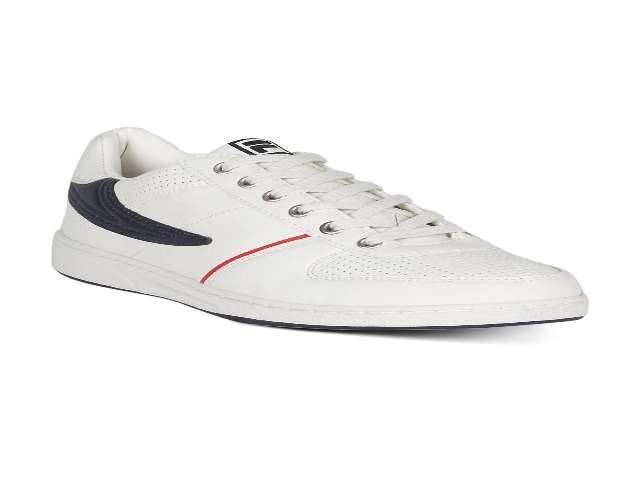

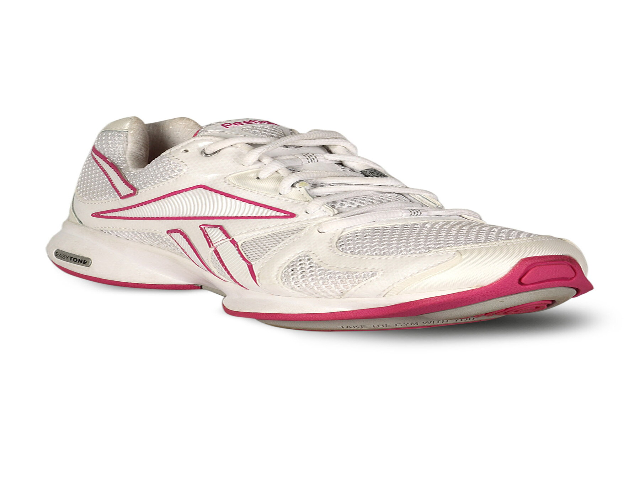

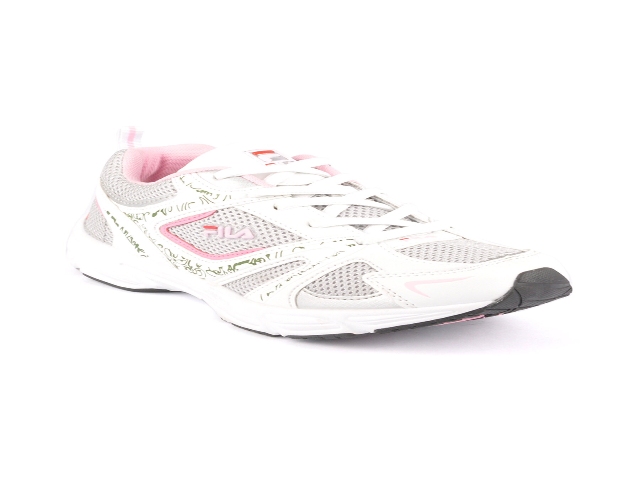

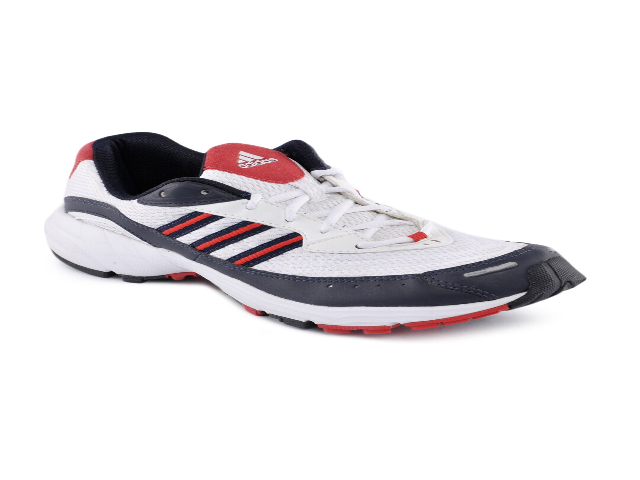

In [31]:
import tensorflow

# from keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

from keras.layers import GlobalMaxPooling2D 
import cv2
import numpy as np
from numpy.linalg import norm
import pickle
from sklearn.neighbors import NearestNeighbors
from google.colab.patches import cv2_imshow


feature_list=np.array(pickle.load(open("featurevector.pkl", "rb")))
filename=pickle.load(open("filenames.pkl", "rb"))

model=ResNet50(weights='imagenet',include_top=False, input_shape=(224,224,3))
model.trainable=False

model=tensorflow.keras.Sequential([
    model, 
    GlobalMaxPooling2D()
])
model.summary()


img=cv2.imread("1636.jpg")
img=cv2.resize(img, (224,224))
img=np.array(img)
expand_img=np.expand_dims(img, axis=0)
pre_img=preprocess_input(expand_img)
result=model.predict(pre_img).flatten()
normalized=result/norm(result)


neighbors=NearestNeighbors(n_neighbors=5, algorithm="brute", metric="euclidean")
neighbors.fit(feature_list)


distance, indices = neighbors.kneighbors([normalized])

print(indices)

for file in indices[0][1:5]:
    # print(filename[file])
    imgName=cv2.imread(filename[file])

    # google.colab.patches.cv2_imshow("Frame",cv2.resize(imgName, (640,480)))
    
    # Resize the image
    imgName = cv2.resize(imgName, (640,480))
    # Display the image
    cv2_imshow(imgName)

    cv2.waitKey(0)

In [32]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 98.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 74.3 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=a5d8e4ee7faaf5c11e7832b55d109bc6f63d2c8bb3b0

In [49]:
%%writefile app.py

import streamlit as st
import os
from PIL import Image
import numpy as np
import pickle
import tensorflow
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm
import cv2

feature_list = np.array(pickle.load(open('featurevector.pkl','rb')))
filenames = pickle.load(open('filenames.pkl','rb'))

model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

st.title('Men & Women Fashion Recommender System')

def save_uploaded_file(uploaded_file):
    try:
        with open(os.path.join('uploads',uploaded_file.name),'wb') as f:
            f.write(uploaded_file.getbuffer())
        return 1
    except:
        return 0

def extract_feature(img_path, model):
    img=cv2.imread(img_path)
    img=cv2.resize(img, (224,224))
    img=np.array(img)
    expand_img=np.expand_dims(img, axis=0)
    pre_img=preprocess_input(expand_img)
    result=model.predict(pre_img).flatten()
    normalized=result/norm(result)
    return normalized

def recommend(features,feature_list):
    neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
    neighbors.fit(feature_list)

    distances, indices = neighbors.kneighbors([features])

    return indices

# steps
# file upload -> save
uploaded_file = st.file_uploader("Choose an image")
print(uploaded_file)
if uploaded_file is not None:
    if save_uploaded_file(uploaded_file):
        # display the file
        display_image = Image.open(uploaded_file)
        resized_img = display_image.resize((200, 200))
        st.image(resized_img)
        # feature extract
        features = extract_feature(os.path.join("uploads",uploaded_file.name),model)
        #st.text(features)
        # recommendention
        indices = recommend(features,feature_list)
        # show
        col1,col2,col3,col4,col5 = st.columns(5)

        with col1:
            st.image(filenames[indices[0][0]])
        with col2:
            st.image(filenames[indices[0][1]])
        with col3:
            st.image(filenames[indices[0][2]])
        with col4:
            st.image(filenames[indices[0][3]])
        with col5:
            st.image(filenames[indices[0][4]])
    else:
        st.header("Some error occured in file upload")


Overwriting app.py


In [35]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=dfc64226343e2bed078558c325df8962849cc74a3657cec5b12d5f984d187885
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [43]:
from pyngrok import ngrok

In [44]:
ngrok.set_auth_token("2GLULD8JoR2dZqbBkOdxHxcGX9d_5bBUTBYSVu6p8UsWrLy2E")

INFO:pyngrok.process:Updating authtoken for default "config_path" of "ngrok_path": /usr/local/lib/python3.8/dist-packages/pyngrok/bin/ngrok
2023-02-19 15:33:30.361 Updating authtoken for default "config_path" of "ngrok_path": /usr/local/lib/python3.8/dist-packages/pyngrok/bin/ngrok


In [ ]:
!nohup streamlit run app.py --server.port 80 &
url = ngrok.connect(port = '80')
print(url)
     